In [107]:
import win32com.client
dssObj = win32com.client.Dispatch("OpenDSSEngine.DSS")
dssText = dssObj.Text
dssCircuit = dssObj.ActiveCircuit
dssSolution = dssCircuit.Solution
dssElem = dssCircuit.ActiveCktElement
dssBus = dssCircuit.ActiveBus
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os
import datetime as dt
import math
import cmath
import numpy as np
from tqdm import tqdm
import random

In [80]:
file_list = os.listdir("Dataset")
data = {}
for file in file_list:
    file_pd = pd.read_csv("Dataset/" + file)
    data[file[3:9].lower()] = file_pd["Power"]

In [123]:
stations = list(data.keys())

In [7]:
result1 = pd.read_csv("result(Yearly_simulation_2019).csv") #Loading the results without phase balancing from the csv file 
result2 = pd.read_csv("result(Yearly_simulation_2019_with_phase_balancing).csv") #Loading the results with phase balancing from the csv file 

In [57]:
dates = []
d0 = dt.datetime(2019, 1, 1)
begin = input("From (year/month/day/hour/minute):")
end = input("To (year/month/day/hour/minute):")
begindt = dt.datetime.strptime(begin, "%Y/%m/%d/%H/%M")
enddt = dt.datetime.strptime(end, "%Y/%m/%d/%H/%M")
begin_delta = begindt - d0
end_delta = enddt - d0
b = int(begin_delta.total_seconds()/60/10)
e = int(end_delta.total_seconds()/60/10)
dates = [begindt + dt.timedelta(minutes = 10 * i) for i in range(e - b)]

From (year/month/day/hour/minute):2019/04/08/10/20
To (year/month/day/hour/minute):2019/04/09/00/00


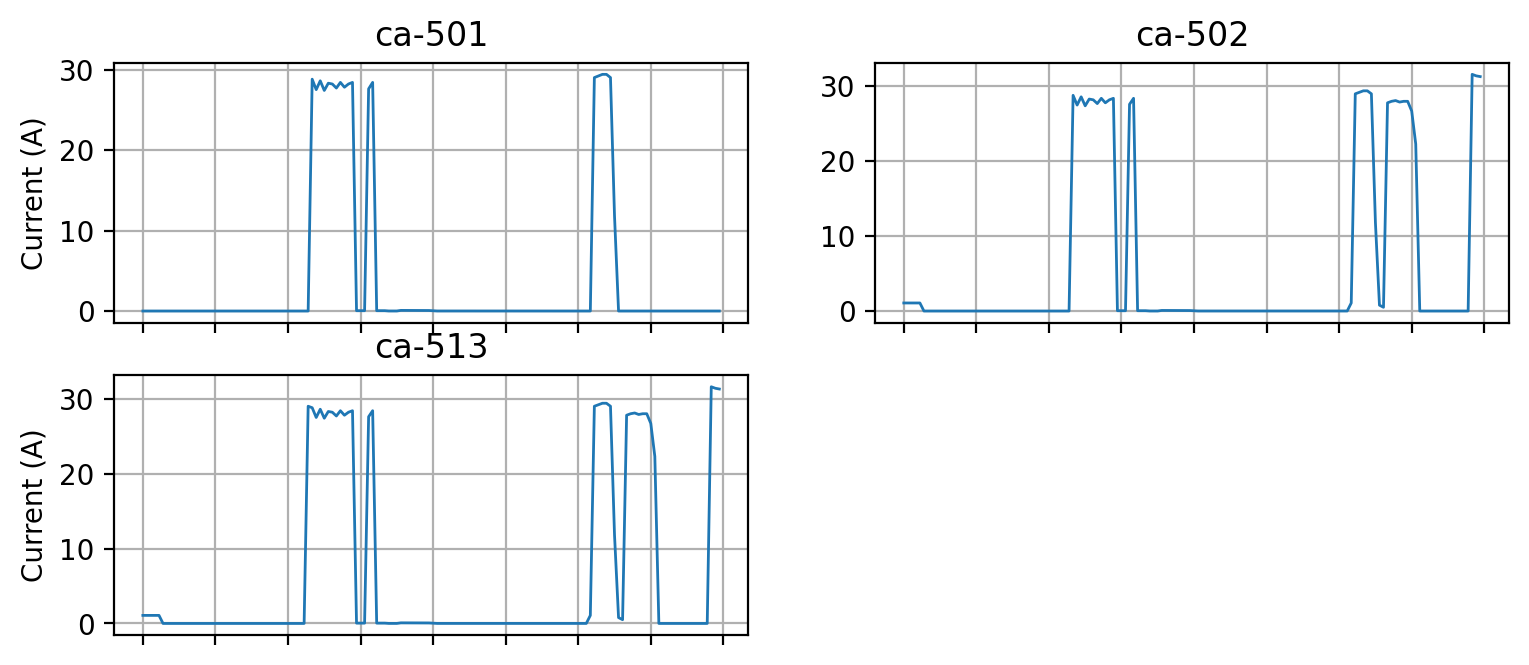

In [15]:
figure(figsize=(9, 10), dpi=200)
plt.subplot(5,2,1)
plt.plot(dates,data[stations[41]][b:e] / 208, linewidth=1)
plt.ylabel("Current (A)")
plt.title(stations[41])
plt.gca().xaxis.set_ticklabels([])
plt.grid()

plt.subplot(5,2,2)
plt.plot(dates,data[stations[42]][b:e] / 208, linewidth=1)
plt.title(stations[42])
plt.gca().xaxis.set_ticklabels([])
plt.grid()

plt.subplot(5,2,3)
plt.plot(dates,data[stations[53]][b:e] / 208, linewidth=1)
plt.ylabel("Current (A)")
plt.title(stations[53])
plt.gca().xaxis.set_ticklabels([])
plt.grid()


In [18]:
n_sim_pt = data["ca-148"].shape[0]
max_started_session = 0
for i in range(1,n_sim_pt):
    started_session = 0
    for station in data:
        if data[station][i - 1] == 0 and data[station][i] > 0:
            started_session += 1
    if started_session > max_started_session:
        max_started_session = started_session
        j = i

In [19]:
max_started_session

22

In [20]:
j

14031

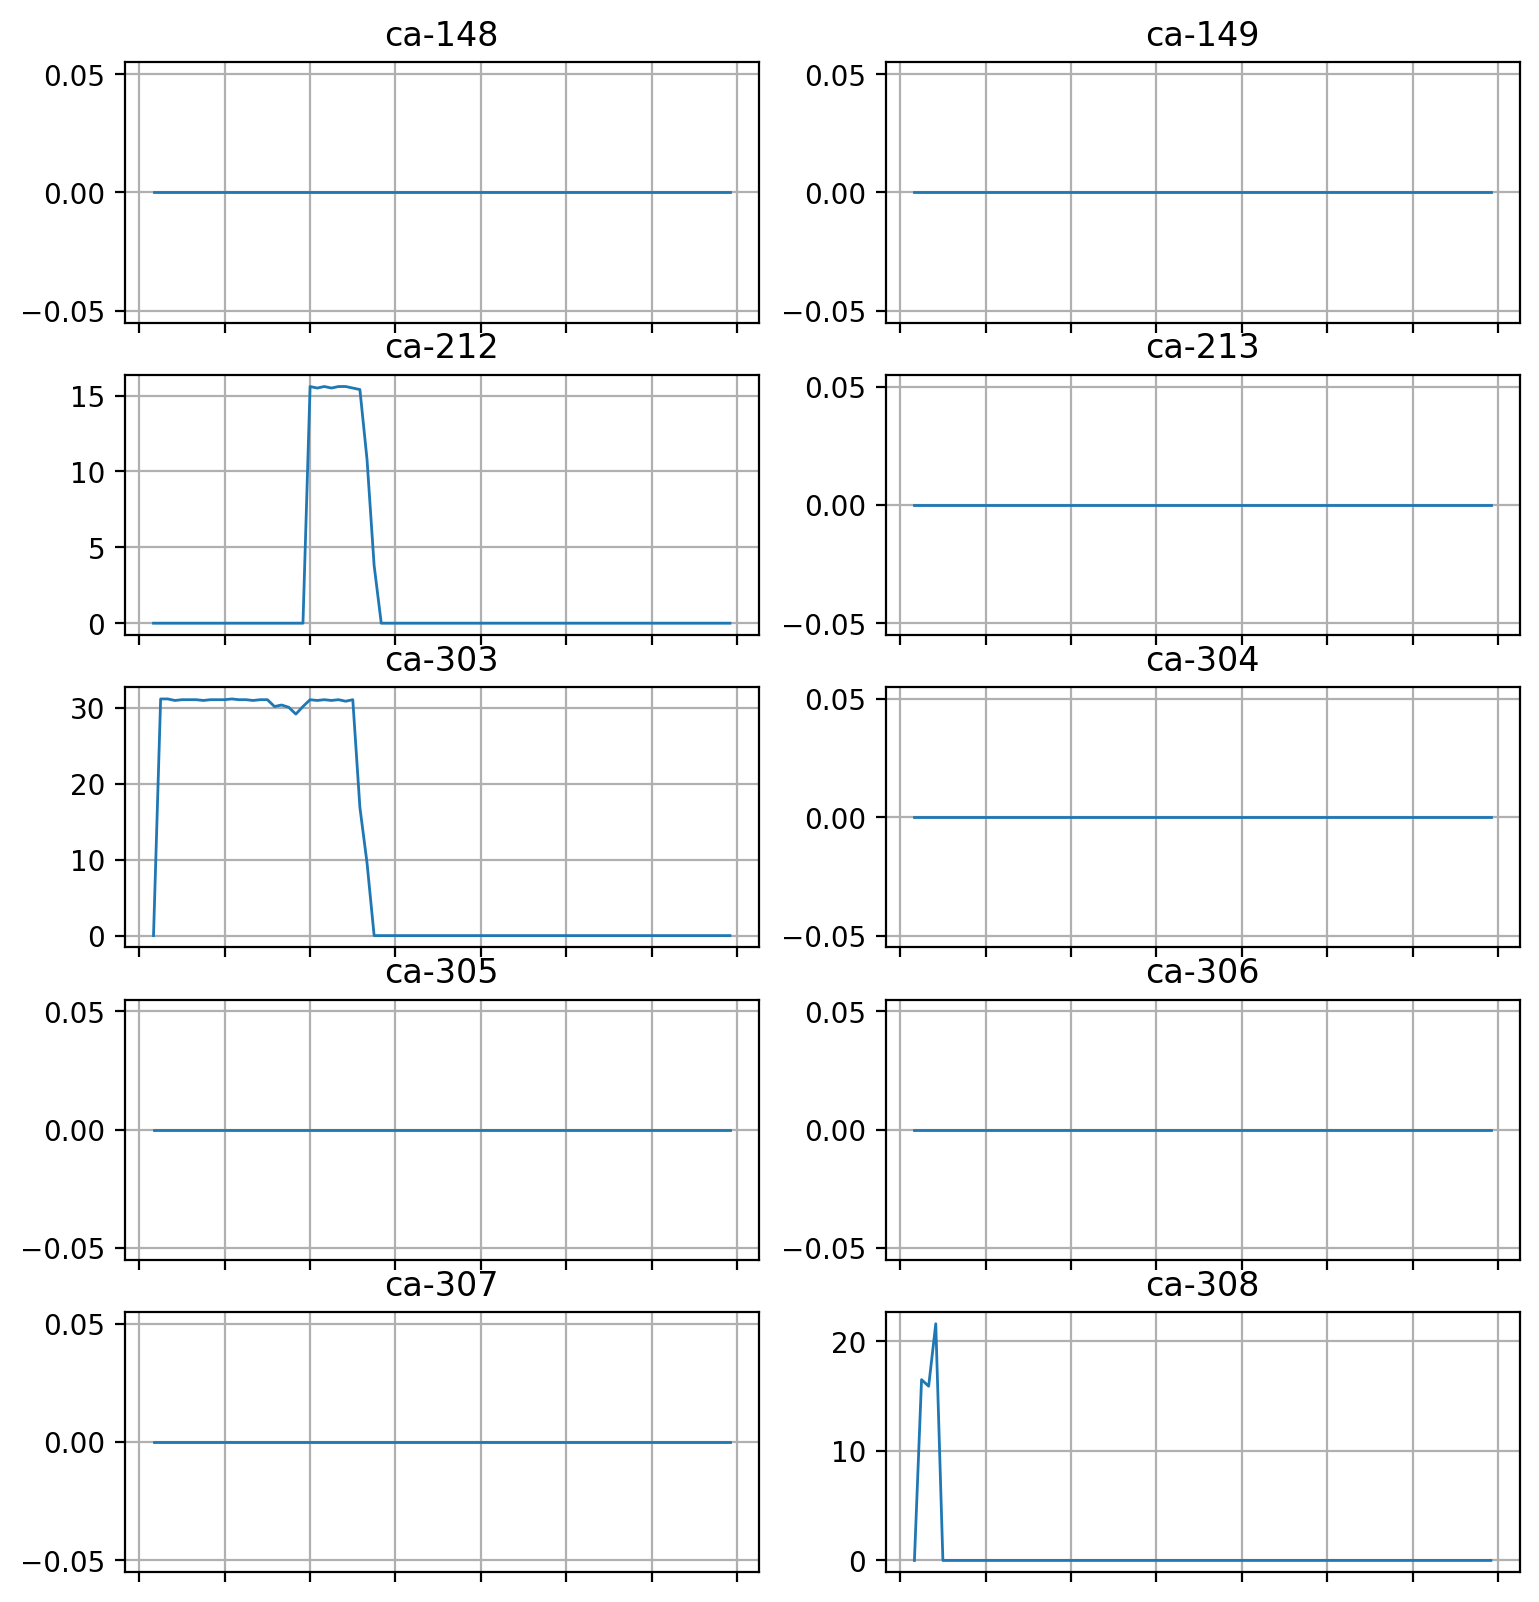

In [58]:
figure(figsize=(9, 10), dpi=200)
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.plot(dates,data[stations[i]][b:e] / 208, linewidth=1)
    plt.title(stations[i])
    plt.gca().xaxis.set_ticklabels([])
    plt.grid()

In [48]:
print("2 sessions")

2 sessions


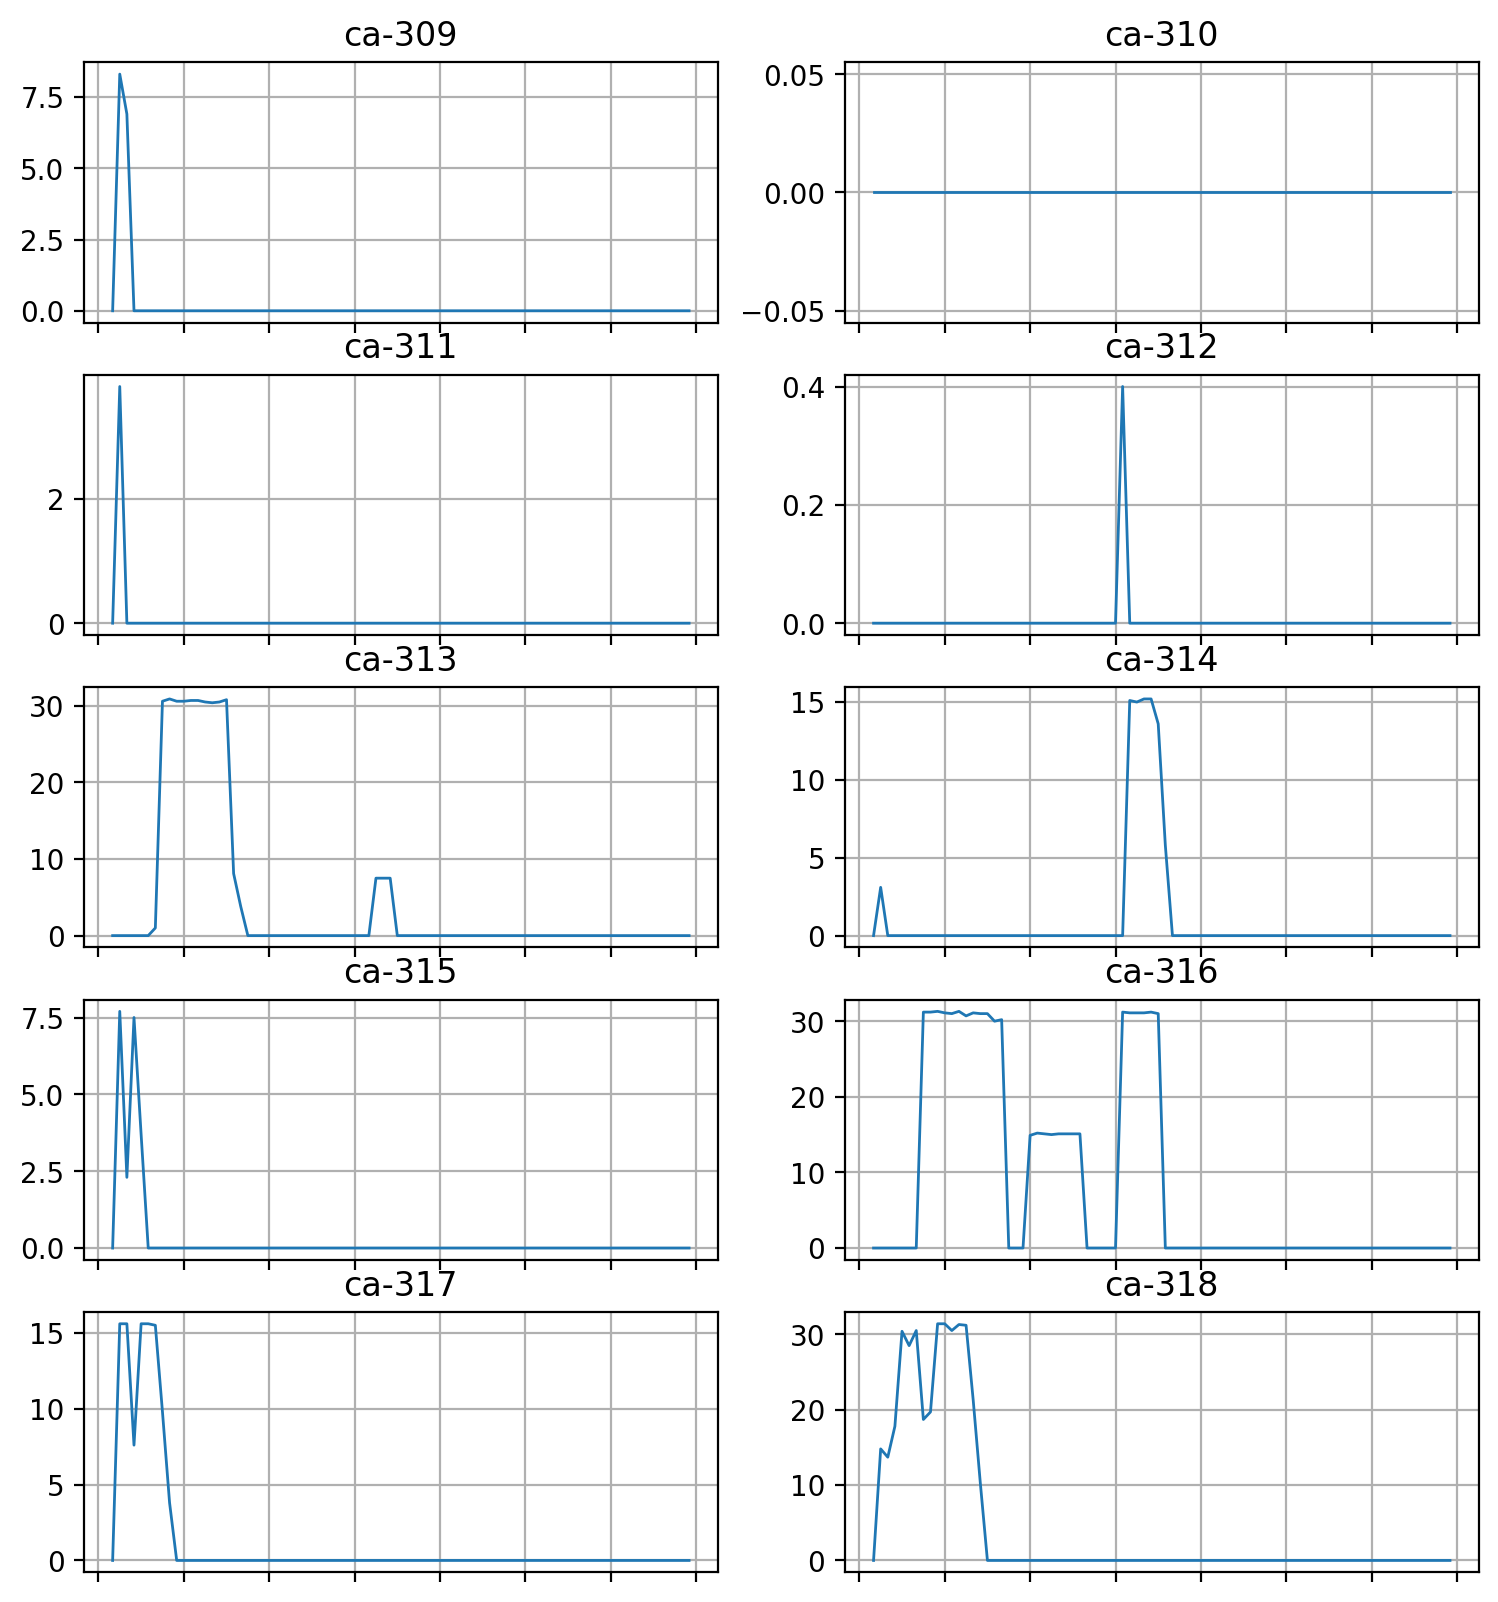

In [59]:
figure(figsize=(9, 10), dpi=200)
for i in range(10,20):
    plt.subplot(5,2,i-9)
    plt.plot(dates,data[stations[i]][b:e] / 208, linewidth=1)
    plt.title(stations[i])
    plt.gca().xaxis.set_ticklabels([])
    plt.grid()

In [49]:
print("6 sessions")

6 sessions


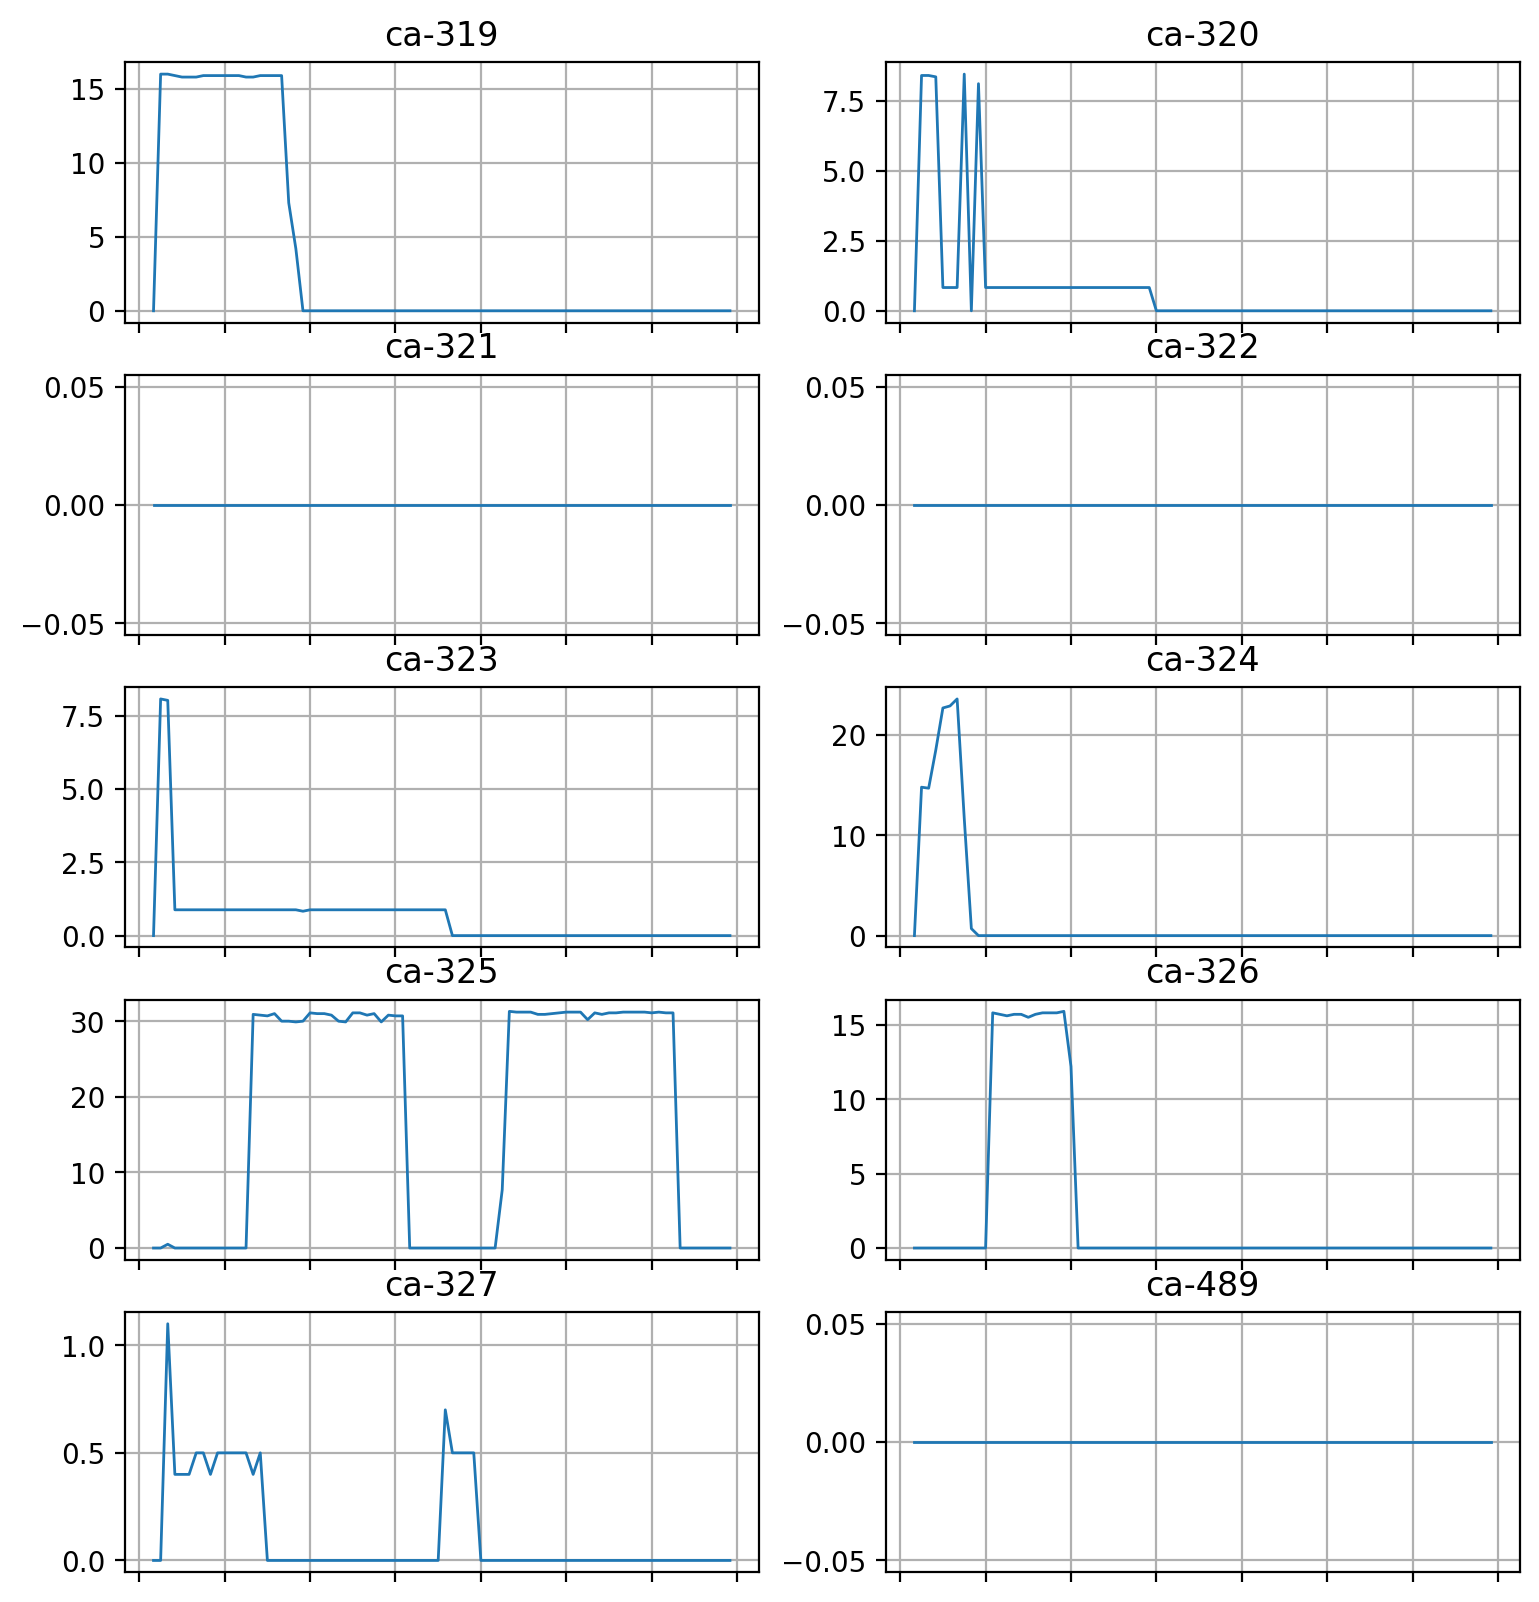

In [60]:
figure(figsize=(9, 10), dpi=200)
for i in range(20,30):
    plt.subplot(5,2,i-19)
    plt.plot(dates,data[stations[i]][b:e] / 208, linewidth=1)
    plt.title(stations[i])
    plt.gca().xaxis.set_ticklabels([])
    plt.grid()

In [61]:
print("4 sessions")

4 sessions


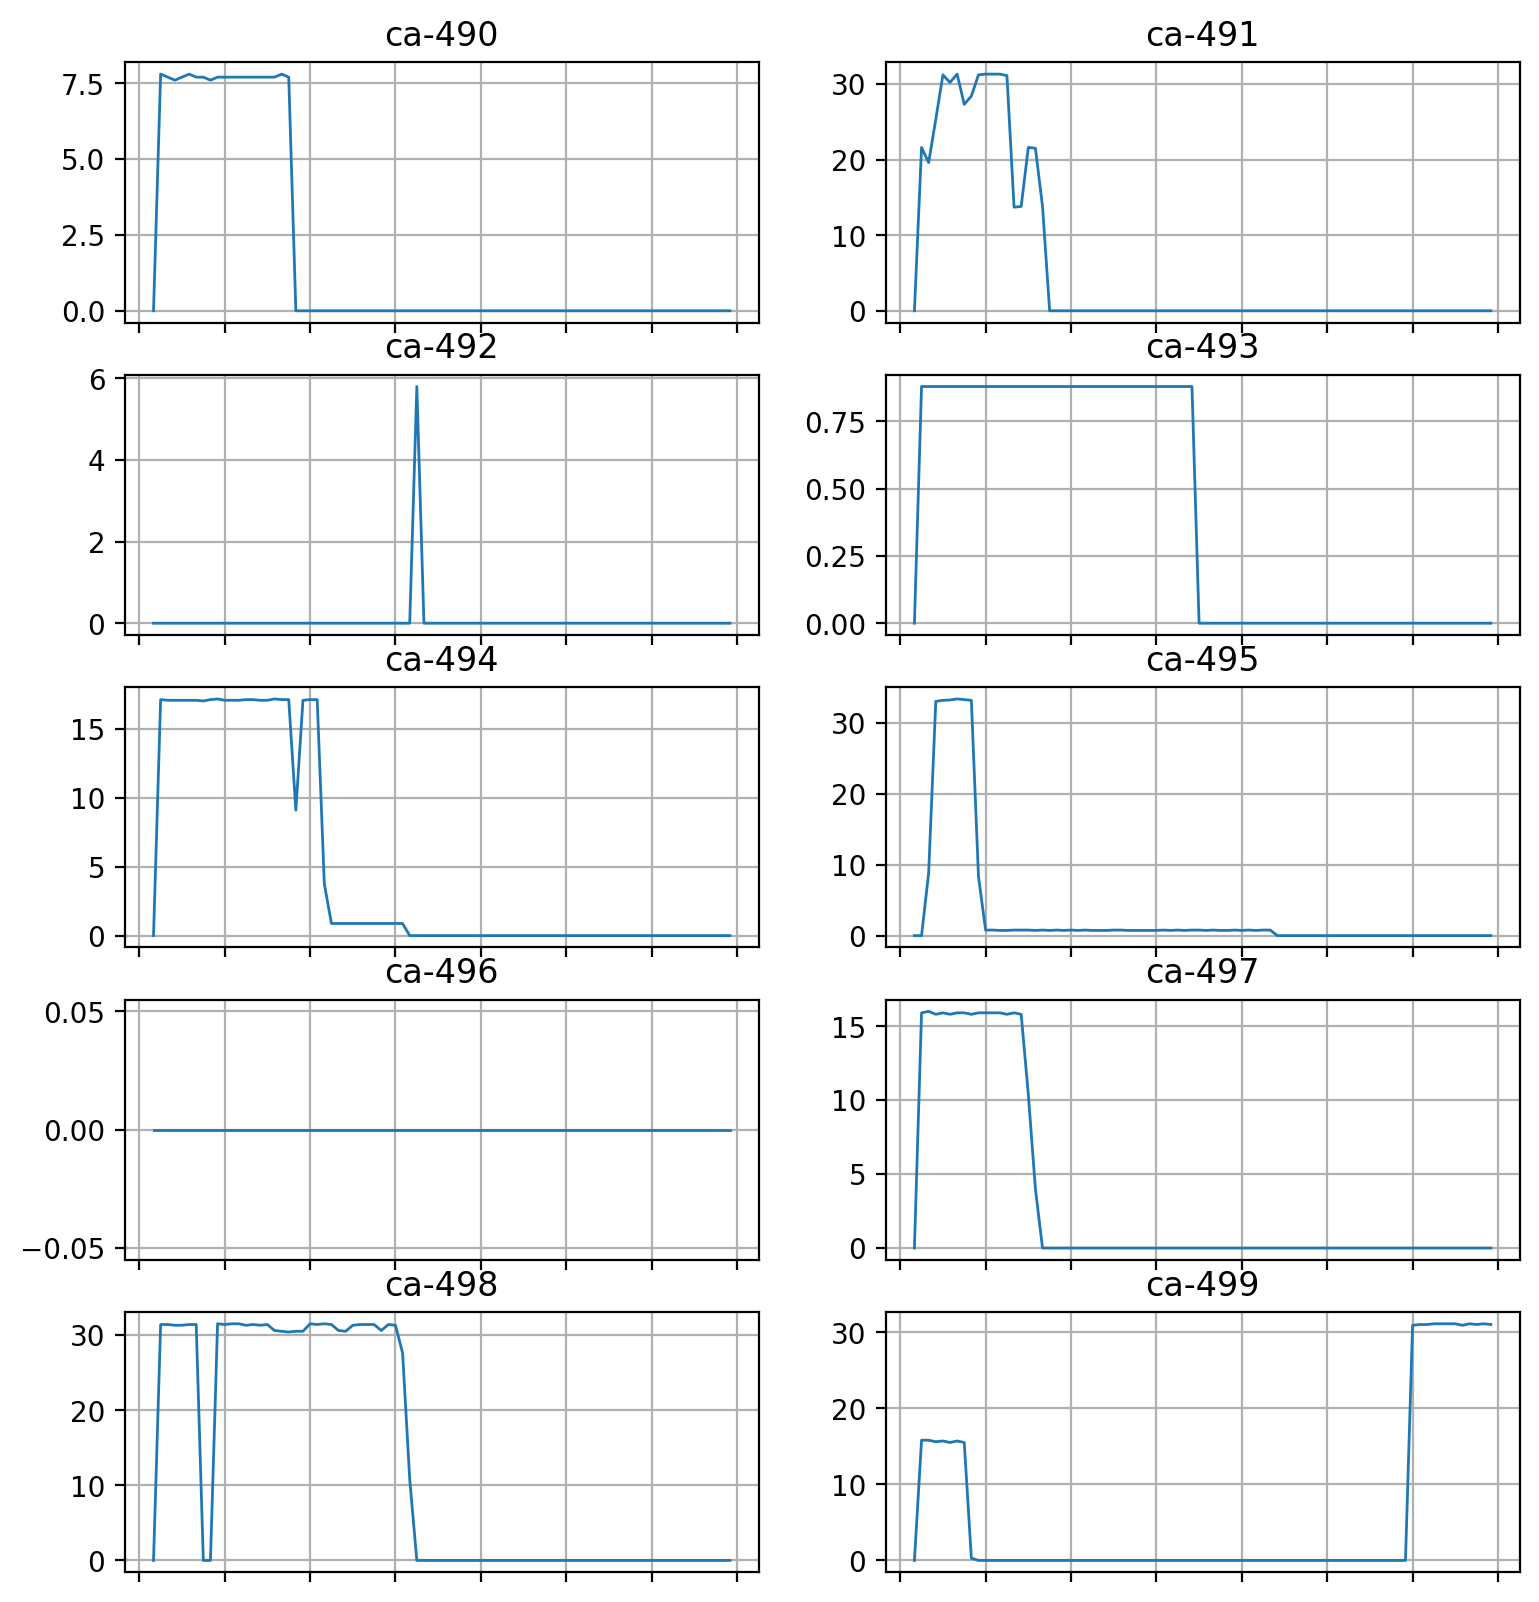

In [64]:
figure(figsize=(9, 10), dpi=200)
for i in range(30,40):
    plt.subplot(5,2,i-29)
    plt.plot(dates,data[stations[i]][b:e] / 208, linewidth=1)
    plt.title(stations[i])
    plt.gca().xaxis.set_ticklabels([])
    plt.grid()

In [65]:
print("7 sessions")

7 sessions


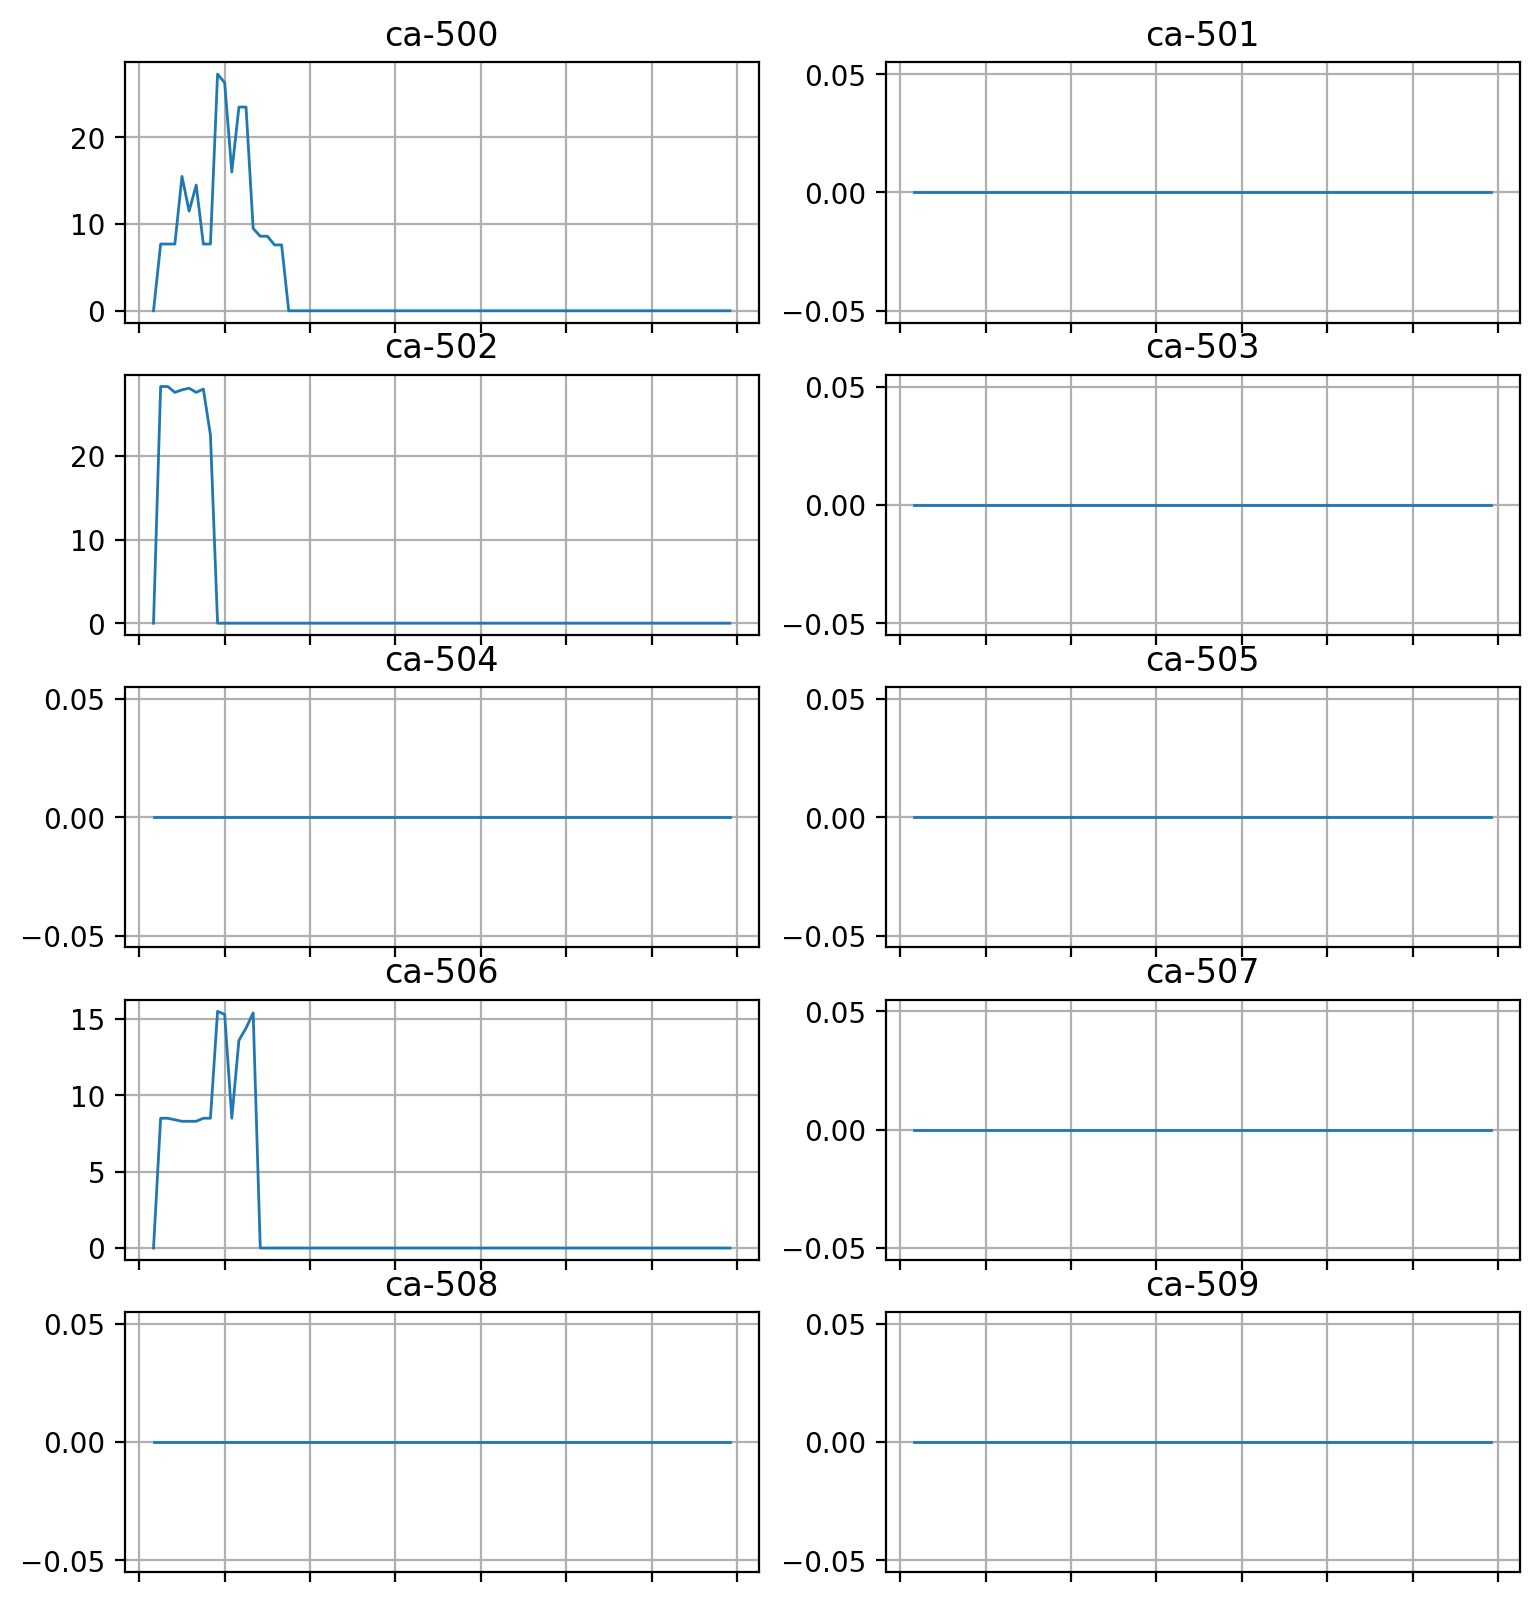

In [66]:
figure(figsize=(9, 10), dpi=200)
for i in range(40,50):
    plt.subplot(5,2,i-39)
    plt.plot(dates,data[stations[i]][b:e] / 208, linewidth=1)
    plt.title(stations[i])
    plt.gca().xaxis.set_ticklabels([])
    plt.grid()

In [55]:
print("3 sessions")

3 sessions


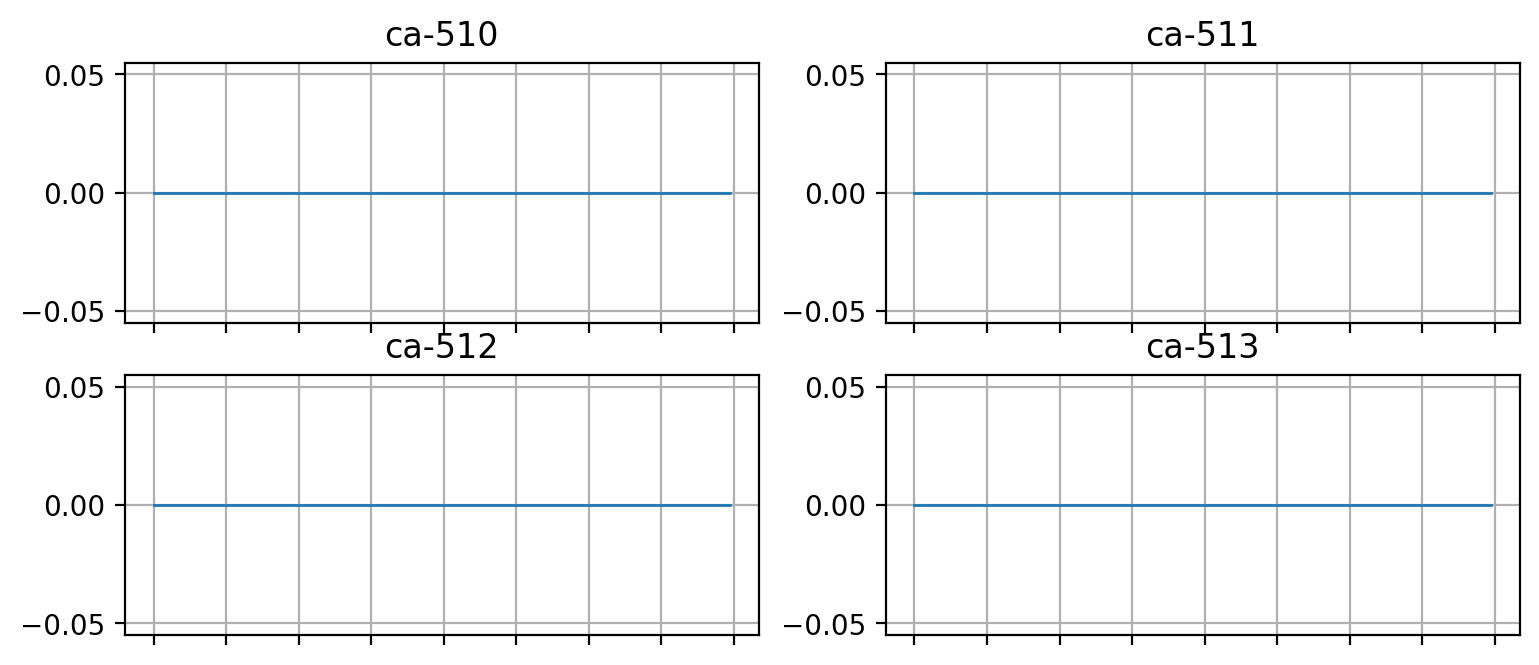

In [56]:
figure(figsize=(9, 10), dpi=200)
for i in range(50,54):
    plt.subplot(5,2,i-49)
    plt.plot(dates,data[stations[i]][b:e] / 208, linewidth=1)
    plt.title(stations[i])
    plt.gca().xaxis.set_ticklabels([])
    plt.grid()

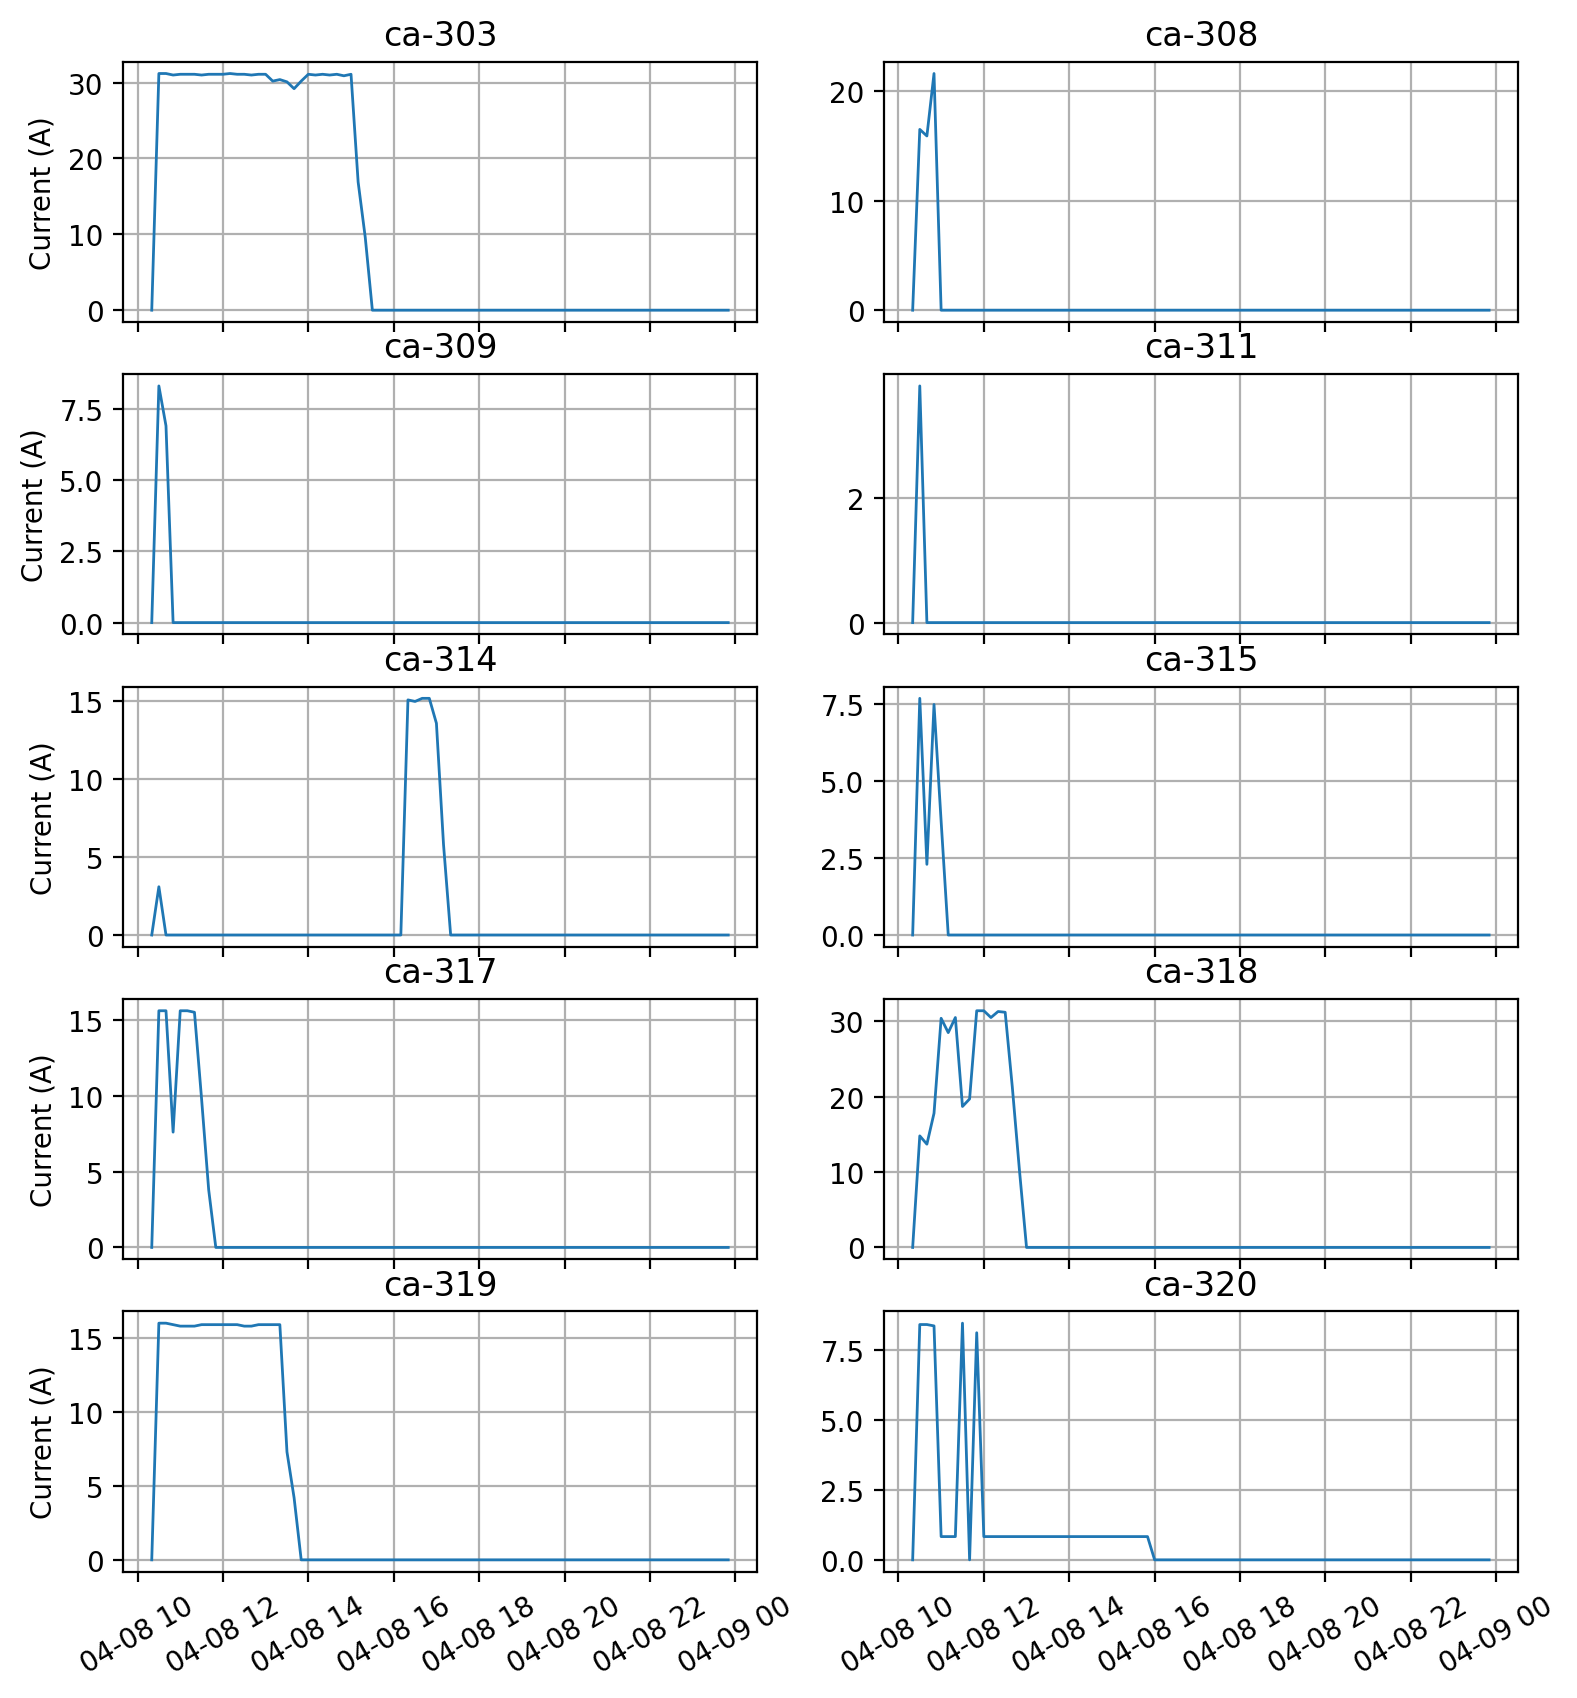

In [68]:
figure(figsize=(9, 10), dpi=200)
plt.subplot(5,2,1)
plt.plot(dates,data[stations[4]][b:e] / 208, linewidth=1)
plt.ylabel("Current (A)")
plt.title(stations[4])
plt.gca().xaxis.set_ticklabels([])
plt.grid()

plt.subplot(5,2,2)
plt.plot(dates,data[stations[9]][b:e] / 208, linewidth=1)
plt.title(stations[9])
plt.gca().xaxis.set_ticklabels([])
plt.grid()

plt.subplot(5,2,3)
plt.plot(dates,data[stations[10]][b:e] / 208, linewidth=1)
plt.ylabel("Current (A)")
plt.title(stations[10])
plt.gca().xaxis.set_ticklabels([])
plt.grid()

plt.subplot(5,2,4)
plt.plot(dates,data[stations[12]][b:e] / 208, linewidth=1)
plt.title(stations[12])
plt.gca().xaxis.set_ticklabels([])
plt.grid()

plt.subplot(5,2,5)
plt.plot(dates,data[stations[15]][b:e] / 208, linewidth=1)
plt.ylabel("Current (A)")
plt.title(stations[15])
plt.gca().xaxis.set_ticklabels([])
plt.grid()

plt.subplot(5,2,6)
plt.plot(dates,data[stations[16]][b:e] / 208, linewidth=1)
plt.title(stations[16])
plt.gca().xaxis.set_ticklabels([])
plt.grid()

plt.subplot(5,2,7)
plt.plot(dates,data[stations[18]][b:e] / 208, linewidth=1)
plt.ylabel("Current (A)")
plt.title(stations[18])
plt.gca().xaxis.set_ticklabels([])
plt.grid()

plt.subplot(5,2,8)
plt.plot(dates,data[stations[19]][b:e] / 208, linewidth=1)
plt.title(stations[19])
plt.gca().xaxis.set_ticklabels([])
plt.grid()

plt.subplot(5,2,9)
plt.plot(dates,data[stations[20]][b:e] / 208, linewidth=1)
plt.ylabel("Current (A)")
plt.title(stations[20])
plt.xticks(rotation=30)
plt.grid()

plt.subplot(5,2,10)
plt.plot(dates,data[stations[21]][b:e] / 208, linewidth=1)
plt.title(stations[21])
plt.xticks(rotation=30)
plt.grid()

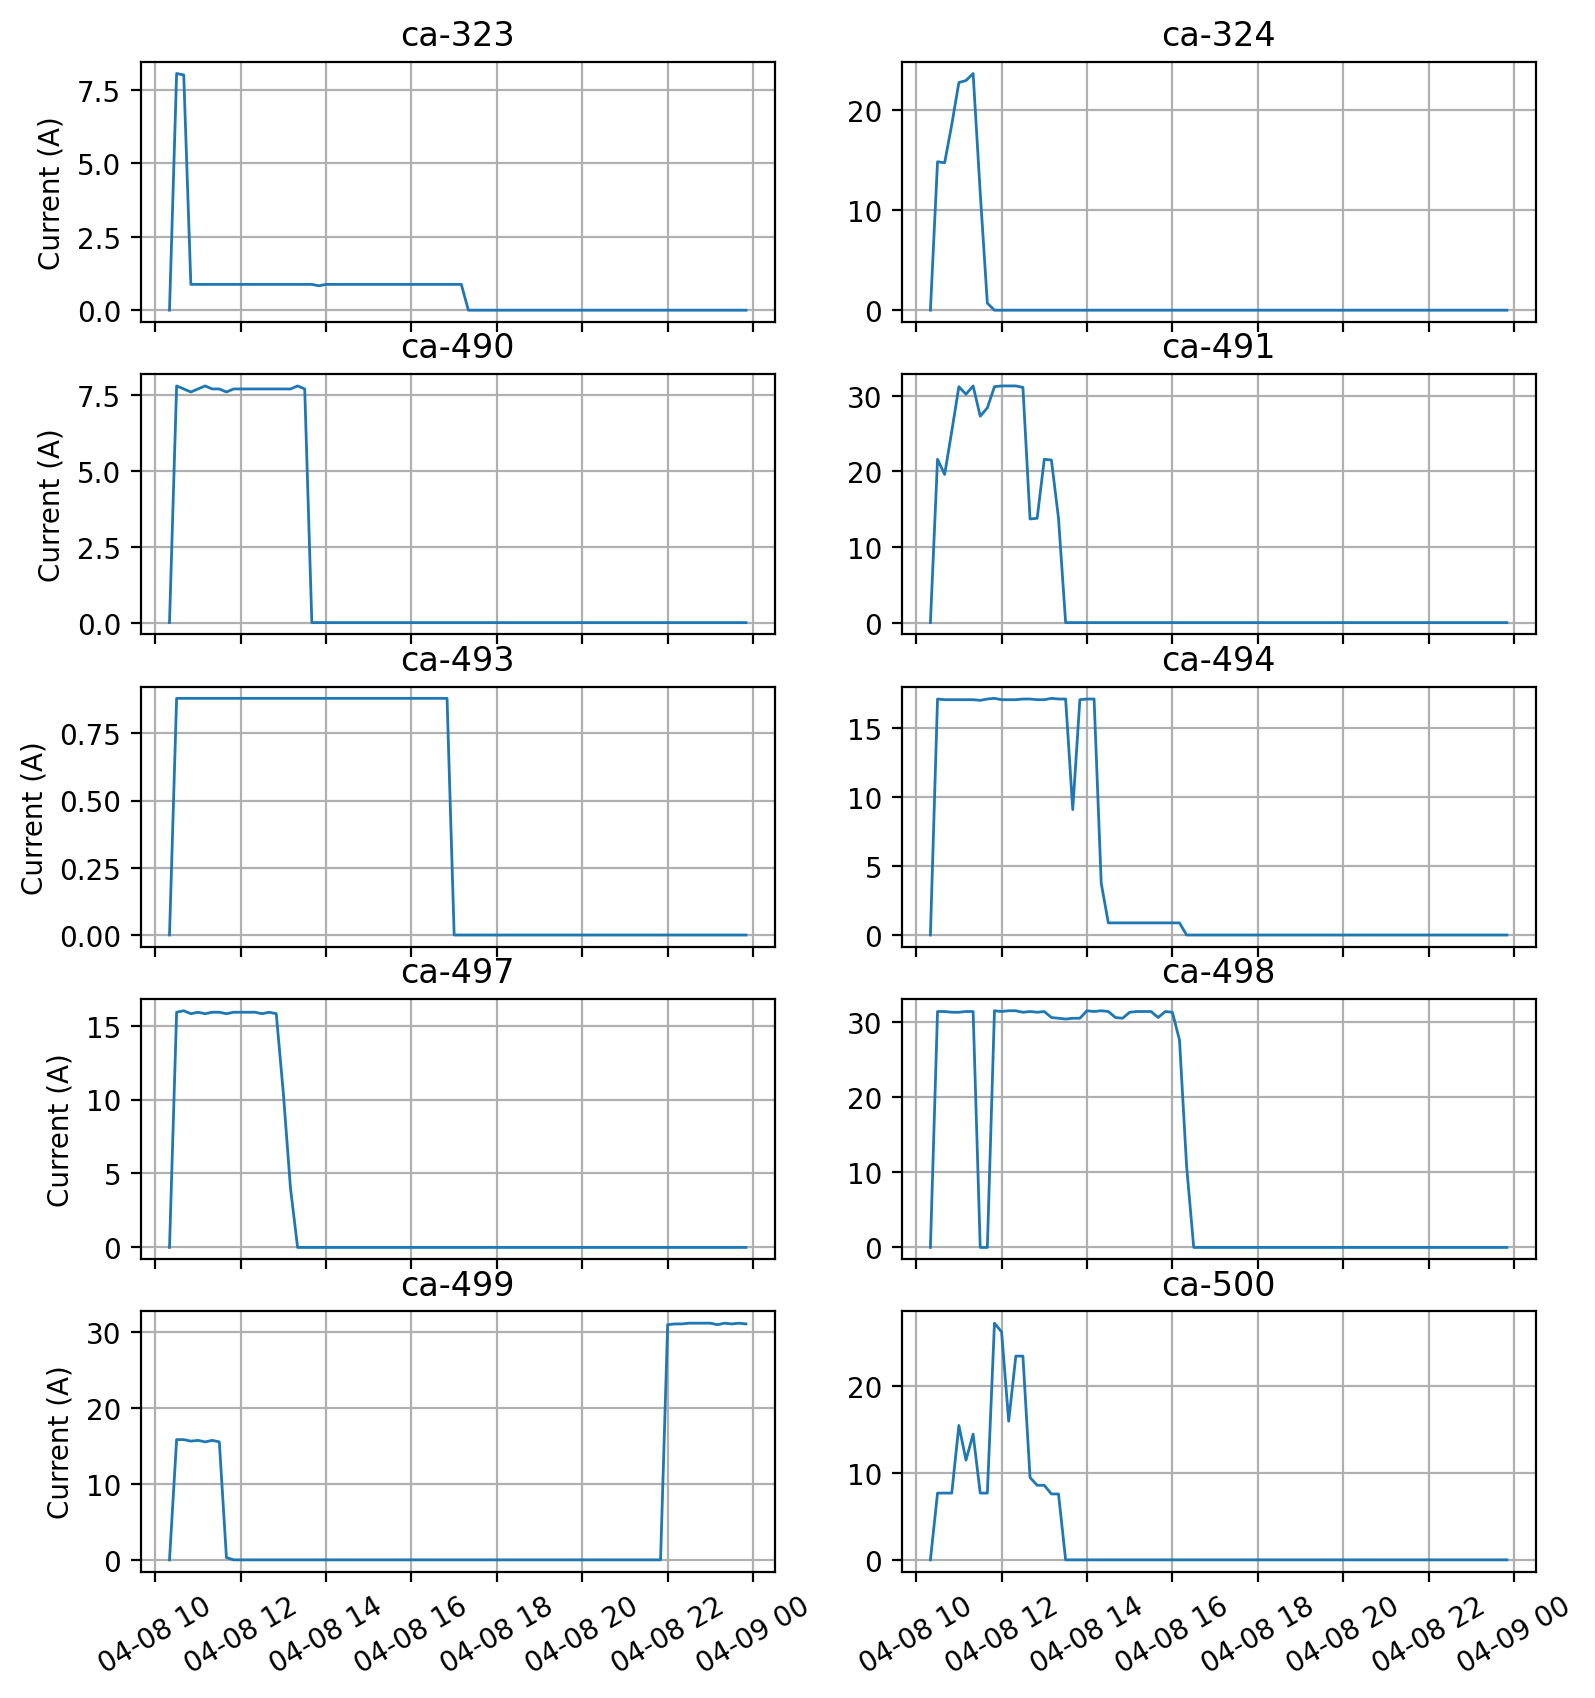

In [69]:
figure(figsize=(9, 10), dpi=200)
plt.subplot(5,2,1)
plt.plot(dates,data[stations[24]][b:e] / 208, linewidth=1)
plt.ylabel("Current (A)")
plt.title(stations[24])
plt.gca().xaxis.set_ticklabels([])
plt.grid()

plt.subplot(5,2,2)
plt.plot(dates,data[stations[25]][b:e] / 208, linewidth=1)
plt.title(stations[25])
plt.gca().xaxis.set_ticklabels([])
plt.grid()

plt.subplot(5,2,3)
plt.plot(dates,data[stations[30]][b:e] / 208, linewidth=1)
plt.ylabel("Current (A)")
plt.title(stations[30])
plt.gca().xaxis.set_ticklabels([])
plt.grid()

plt.subplot(5,2,4)
plt.plot(dates,data[stations[31]][b:e] / 208, linewidth=1)
plt.title(stations[31])
plt.gca().xaxis.set_ticklabels([])
plt.grid()

plt.subplot(5,2,5)
plt.plot(dates,data[stations[33]][b:e] / 208, linewidth=1)
plt.ylabel("Current (A)")
plt.title(stations[33])
plt.gca().xaxis.set_ticklabels([])
plt.grid()

plt.subplot(5,2,6)
plt.plot(dates,data[stations[34]][b:e] / 208, linewidth=1)
plt.title(stations[34])
plt.gca().xaxis.set_ticklabels([])
plt.grid()

plt.subplot(5,2,7)
plt.plot(dates,data[stations[37]][b:e] / 208, linewidth=1)
plt.ylabel("Current (A)")
plt.title(stations[37])
plt.gca().xaxis.set_ticklabels([])
plt.grid()

plt.subplot(5,2,8)
plt.plot(dates,data[stations[38]][b:e] / 208, linewidth=1)
plt.title(stations[38])
plt.gca().xaxis.set_ticklabels([])
plt.grid()

plt.subplot(5,2,9)
plt.plot(dates,data[stations[39]][b:e] / 208, linewidth=1)
plt.ylabel("Current (A)")
plt.title(stations[39])
plt.xticks(rotation=30)
plt.grid()

plt.subplot(5,2,10)
plt.plot(dates,data[stations[40]][b:e] / 208, linewidth=1)
plt.title(stations[40])
plt.xticks(rotation=30)
plt.grid()

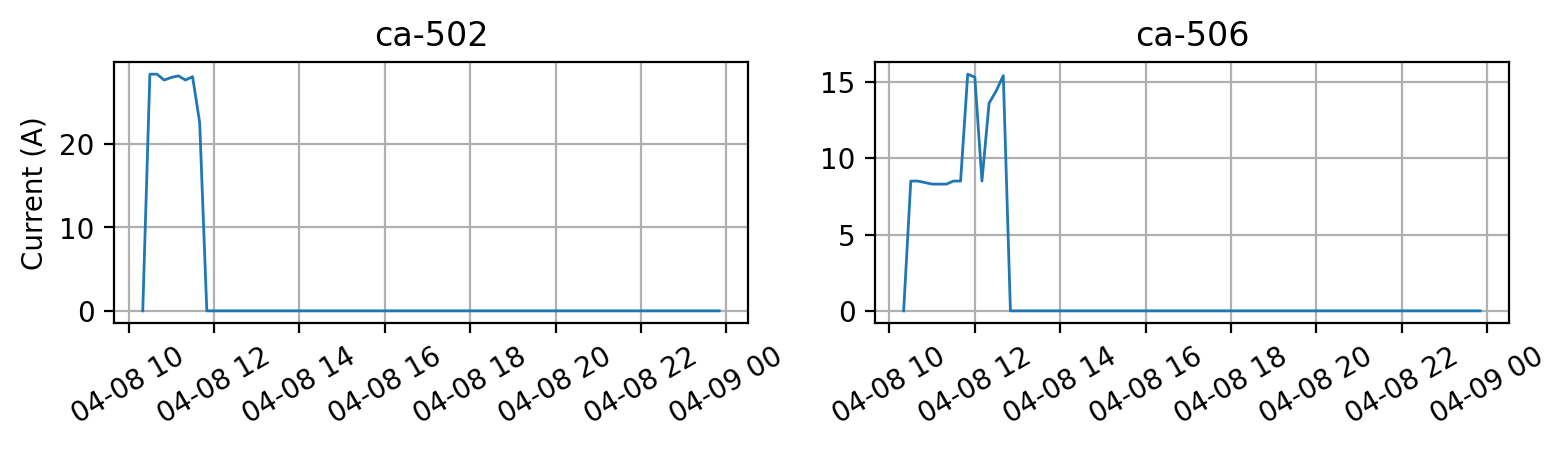

In [72]:
figure(figsize=(9, 10), dpi=200)
plt.subplot(5,2,1)
plt.plot(dates,data[stations[42]][b:e] / 208, linewidth=1)
plt.ylabel("Current (A)")
plt.title(stations[42])
plt.xticks(rotation=30)
plt.grid()

plt.subplot(5,2,2)
plt.plot(dates,data[stations[46]][b:e] / 208, linewidth=1)
plt.title(stations[46])
plt.xticks(rotation=30)
plt.grid()

In [81]:
simultaneous_sessions_index = [4, 9, 10, 12, 15, 16, 18, 19, 20, 21, 24, 25, 30, 31, 33, 34, 37, 38, 39, 40, 42, 46]

In [82]:
station_bus = {"ca-148": "1", 
               "ca-149" :"2",
               "ca-212" :"3",
               "ca-213" :"4",
               "ca-303" :"9",
               "ca-304" :"10",
               "ca-305" : "11",
               "ca-306" : "12",
               "ca-307" : "13",
               "ca-308" : "14",
               "ca-309" : "15",
               "ca-310" : "16",
               "ca-311" : "21",
               "ca-312" : "22",
               "ca-313" : "23",
               "ca-314" : "24",
               "ca-315" : "27",
               "ca-316" : "28",
               "ca-317" : "29",
               "ca-318" : "30",
               "ca-319" : "31",
               "ca-320" : "37",
               "ca-321" : "38",
               "ca-322" : "39",
               "ca-323" : "40",
               "ca-324" : "41",
               "ca-325" : "42",
               "ca-326" : "43",
               "ca-327" : "44",
               "ca-489" : "45",
               "ca-490" : "46",
               "ca-491" : "52",
               "ca-492" : "53",
               "ca-493" : "54",
               "ca-494" : "55",
               "ca-495" : "56",
               "ca-496" : "57",
               "ca-497" : "58",
               "ca-498" : "59",
               "ca-499" : "60",
               "ca-500" : "66",
               "ca-501" : "67",
               "ca-502" : "68",
               "ca-503" : "69",
               "ca-504" : "70",
               "ca-505" : "71",
               "ca-506" : "72",
               "ca-507" : "73",
               "ca-508" : "74",
               "ca-509" : "75",
               "ca-510" : "81",
               "ca-511" : "82",
               "ca-512" : "83",
               "ca-513" : "84"
              } #Initializing station_bus dictionary zeros (this doesn't affect the simulation beacause the results are saved ones the main loop begins)


In [83]:
dssText.Command = "compile 'C:/Users/lazhe/OneDrive/Thesis/OpenDSS/OpenDSS_simulations/1_Yearly_simulation_with_lines_losses/Master.DSS'"

['ca-148', 'ca-149', 'ca-212', 'ca-213', 'ca-303', 'ca-304', 'ca-305', 'ca-306', 'ca-307', 'ca-308', 'ca-309', 'ca-310', 'ca-311', 'ca-312', 'ca-313', 'ca-314', 'ca-315', 'ca-316', 'ca-317', 'ca-318', 'ca-319', 'ca-320', 'ca-321', 'ca-322', 'ca-323', 'ca-324', 'ca-325', 'ca-326', 'ca-327', 'ca-489', 'ca-490', 'ca-491', 'ca-492', 'ca-493', 'ca-494', 'ca-495', 'ca-496', 'ca-497', 'ca-498', 'ca-499', 'ca-500', 'ca-501', 'ca-502', 'ca-503', 'ca-504', 'ca-505', 'ca-506', 'ca-507', 'ca-508', 'ca-509', 'ca-510', 'ca-511', 'ca-512', 'ca-513']


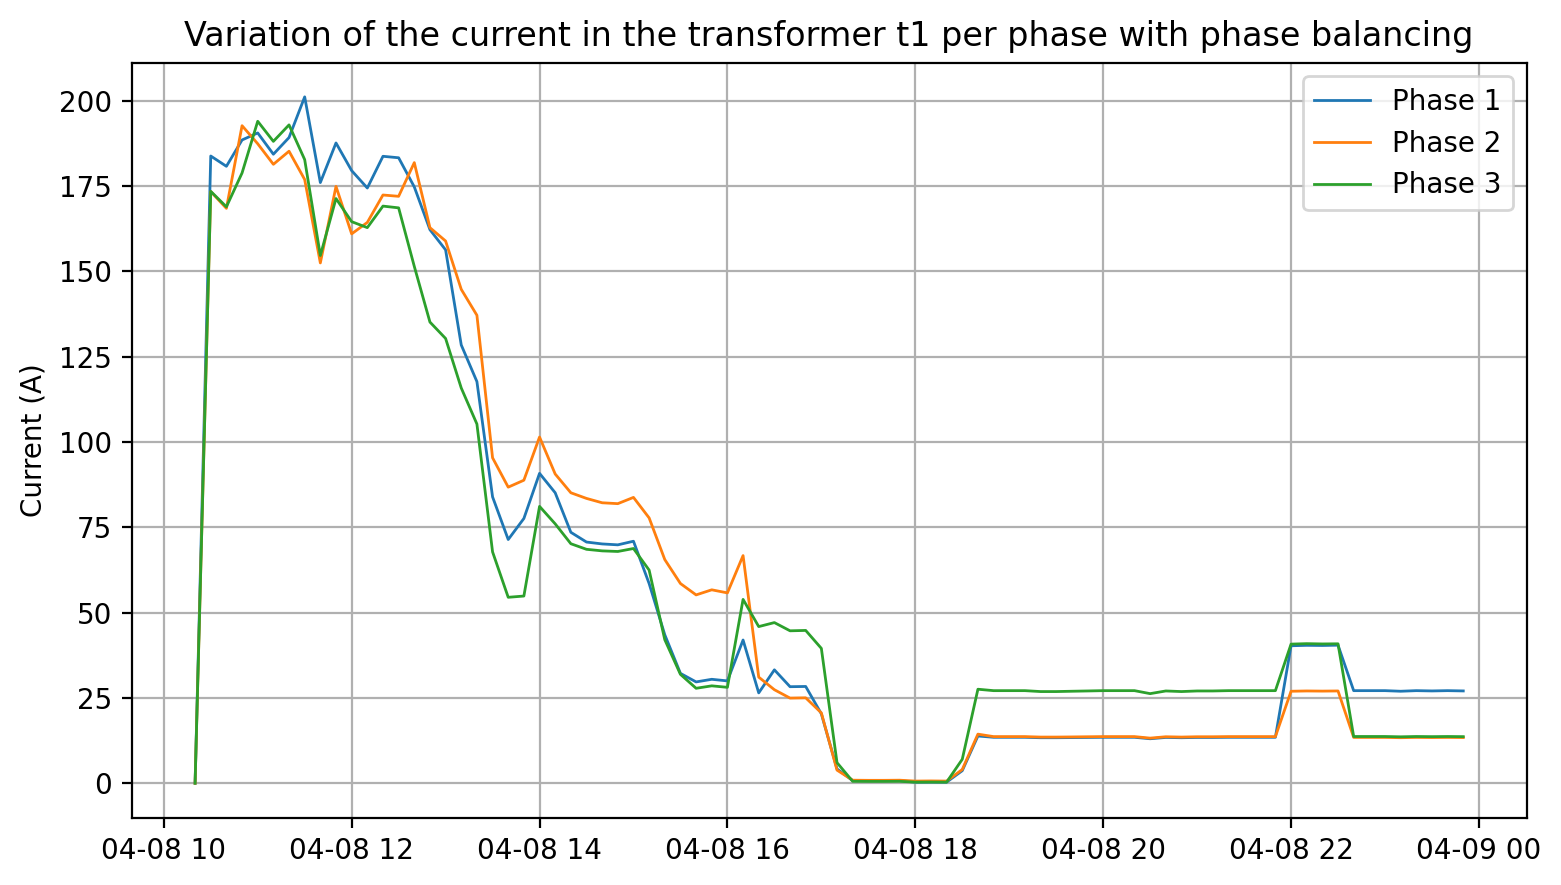

['ca-513', 'ca-303', 'ca-509', 'ca-148', 'ca-321', 'ca-508', 'ca-507', 'ca-316', 'ca-149', 'ca-495', 'ca-499', 'ca-502', 'ca-310', 'ca-489', 'ca-498', 'ca-501', 'ca-213', 'ca-320', 'ca-323', 'ca-309', 'ca-490', 'ca-326', 'ca-325', 'ca-497', 'ca-315', 'ca-491', 'ca-510', 'ca-500', 'ca-324', 'ca-306', 'ca-313', 'ca-494', 'ca-317', 'ca-511', 'ca-212', 'ca-308', 'ca-512', 'ca-319', 'ca-318', 'ca-496', 'ca-312', 'ca-505', 'ca-327', 'ca-314', 'ca-311', 'ca-506', 'ca-307', 'ca-322', 'ca-492', 'ca-304', 'ca-493', 'ca-305', 'ca-504', 'ca-503']


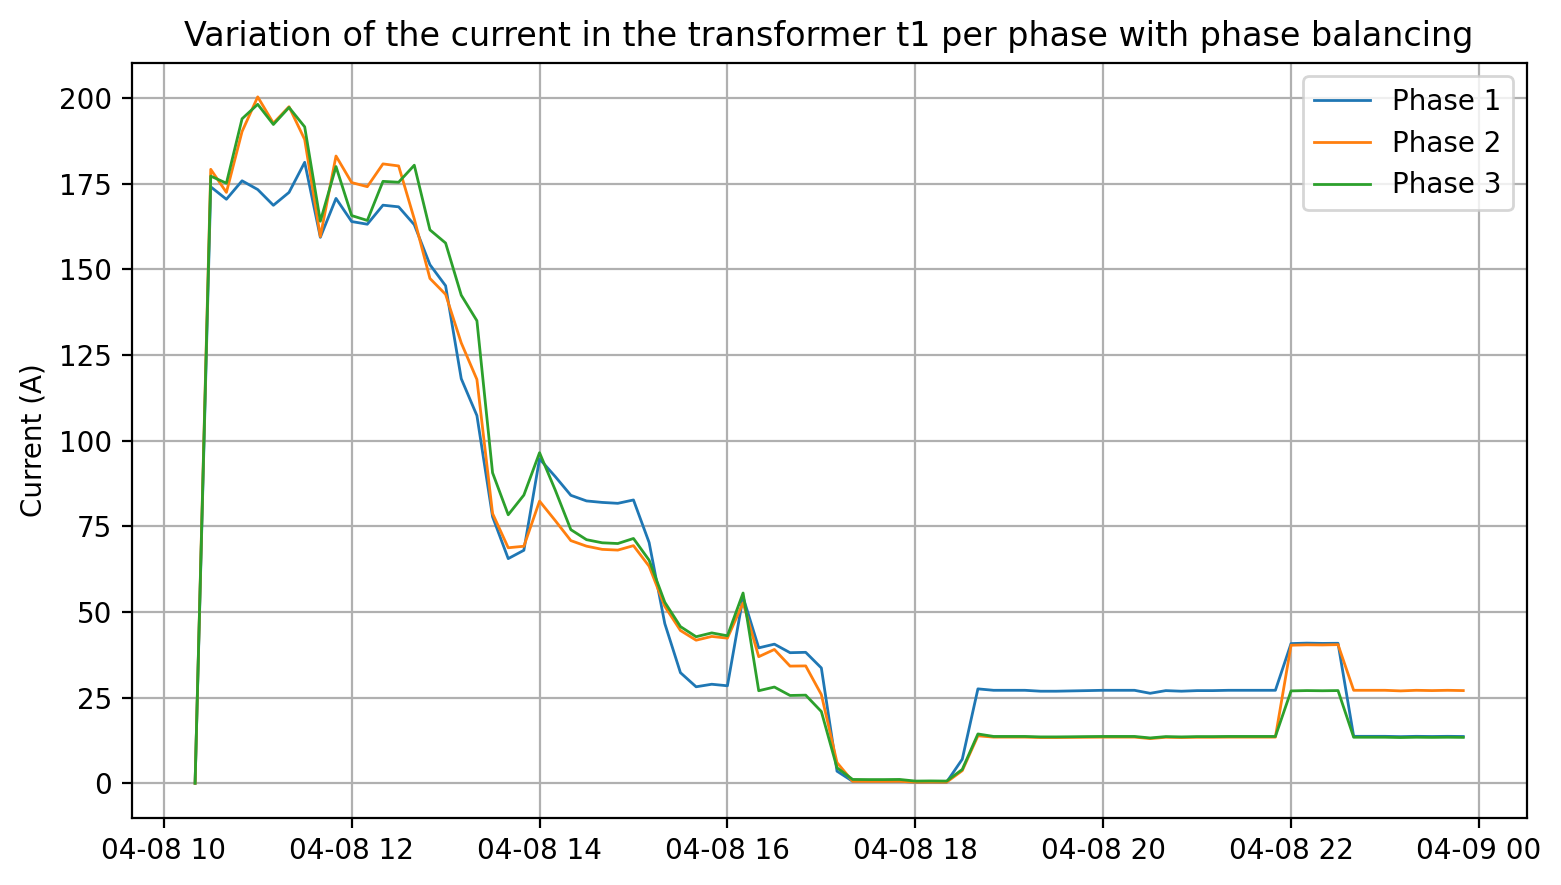

['ca-507', 'ca-504', 'ca-318', 'ca-307', 'ca-508', 'ca-492', 'ca-494', 'ca-513', 'ca-309', 'ca-510', 'ca-493', 'ca-317', 'ca-213', 'ca-316', 'ca-315', 'ca-312', 'ca-511', 'ca-306', 'ca-325', 'ca-497', 'ca-502', 'ca-498', 'ca-501', 'ca-326', 'ca-323', 'ca-212', 'ca-490', 'ca-319', 'ca-148', 'ca-311', 'ca-304', 'ca-491', 'ca-512', 'ca-499', 'ca-321', 'ca-305', 'ca-327', 'ca-314', 'ca-503', 'ca-489', 'ca-320', 'ca-500', 'ca-324', 'ca-509', 'ca-308', 'ca-505', 'ca-149', 'ca-313', 'ca-322', 'ca-310', 'ca-506', 'ca-496', 'ca-495', 'ca-303']


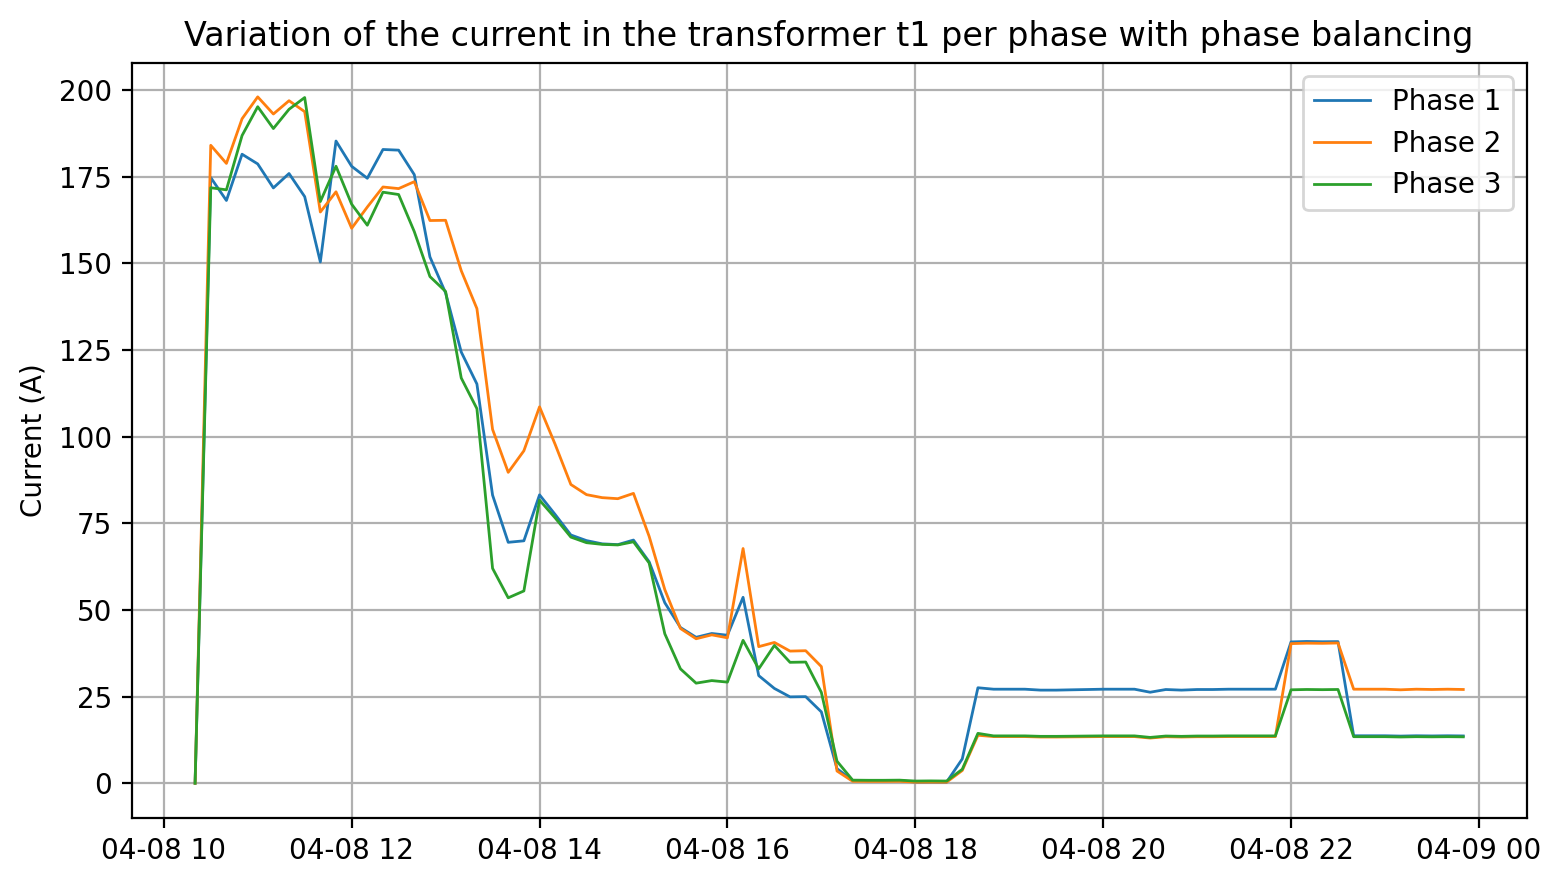

['ca-512', 'ca-511', 'ca-326', 'ca-320', 'ca-305', 'ca-309', 'ca-317', 'ca-319', 'ca-324', 'ca-316', 'ca-303', 'ca-506', 'ca-314', 'ca-304', 'ca-499', 'ca-507', 'ca-148', 'ca-504', 'ca-513', 'ca-212', 'ca-508', 'ca-500', 'ca-149', 'ca-495', 'ca-501', 'ca-312', 'ca-318', 'ca-493', 'ca-308', 'ca-310', 'ca-502', 'ca-327', 'ca-510', 'ca-307', 'ca-497', 'ca-322', 'ca-498', 'ca-213', 'ca-503', 'ca-313', 'ca-496', 'ca-489', 'ca-491', 'ca-321', 'ca-509', 'ca-505', 'ca-490', 'ca-494', 'ca-323', 'ca-325', 'ca-492', 'ca-311', 'ca-306', 'ca-315']


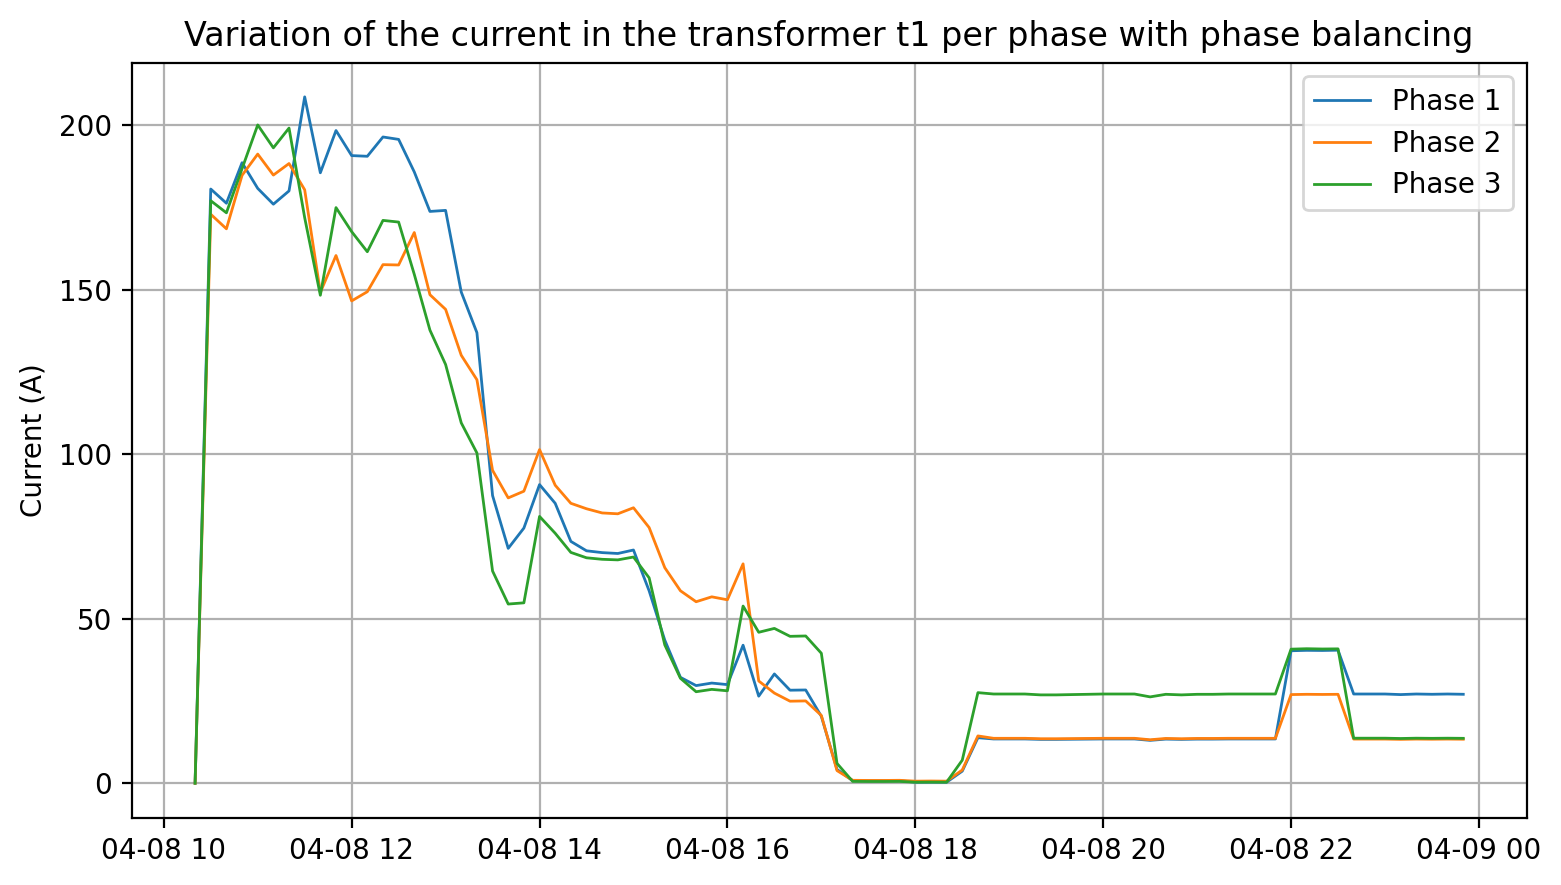

['ca-304', 'ca-313', 'ca-307', 'ca-309', 'ca-318', 'ca-148', 'ca-489', 'ca-213', 'ca-316', 'ca-505', 'ca-327', 'ca-305', 'ca-509', 'ca-496', 'ca-326', 'ca-498', 'ca-322', 'ca-325', 'ca-506', 'ca-306', 'ca-501', 'ca-312', 'ca-212', 'ca-492', 'ca-500', 'ca-491', 'ca-495', 'ca-508', 'ca-311', 'ca-323', 'ca-314', 'ca-321', 'ca-493', 'ca-513', 'ca-512', 'ca-303', 'ca-504', 'ca-490', 'ca-502', 'ca-507', 'ca-319', 'ca-310', 'ca-308', 'ca-510', 'ca-499', 'ca-149', 'ca-320', 'ca-324', 'ca-494', 'ca-511', 'ca-497', 'ca-317', 'ca-503', 'ca-315']


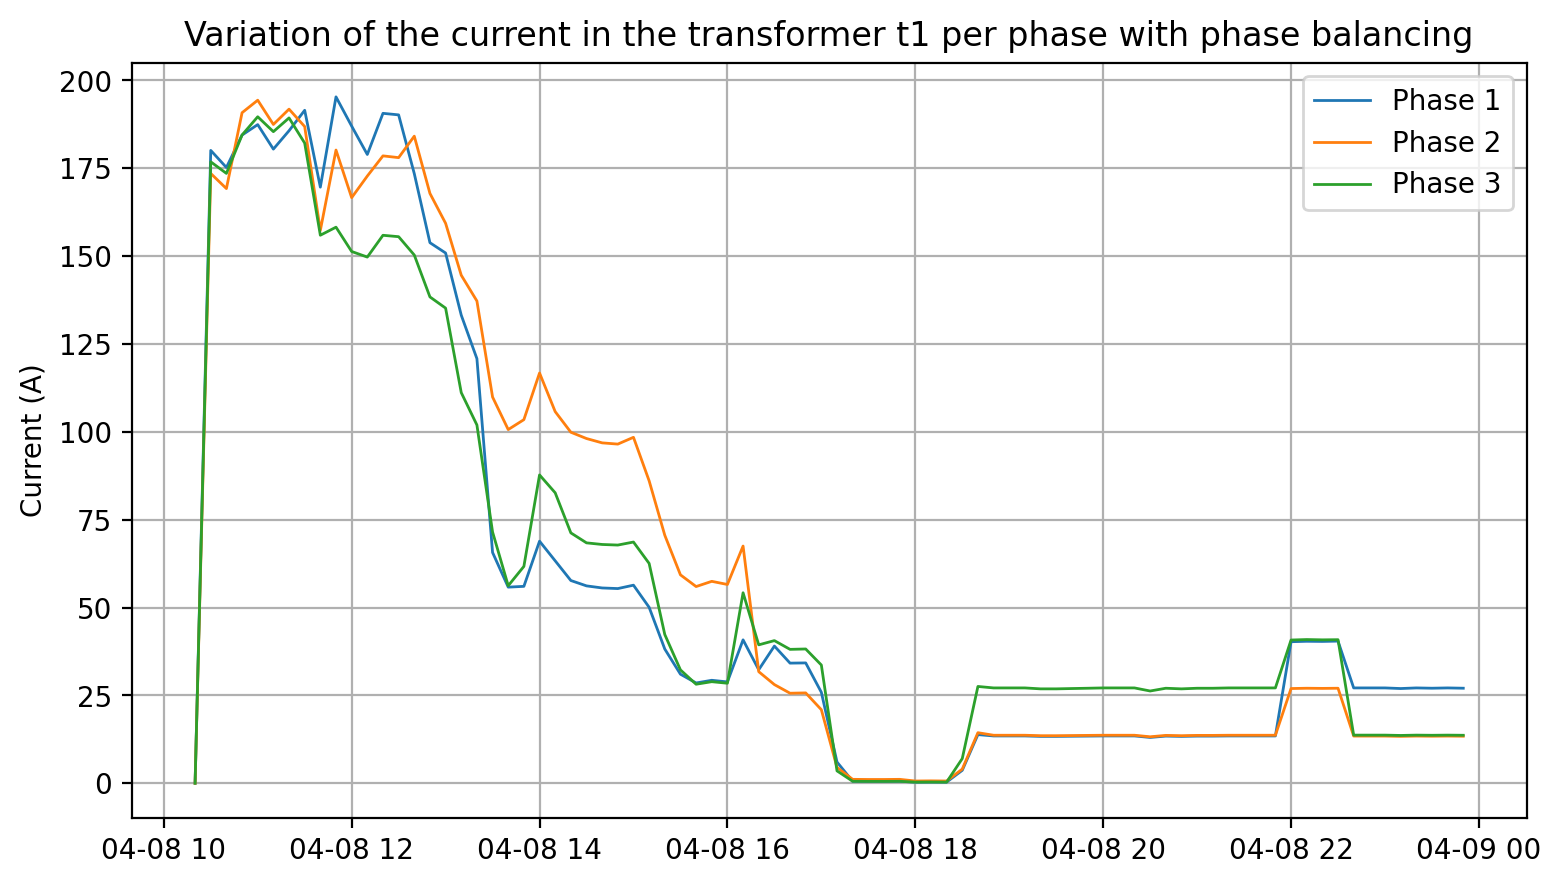

['ca-310', 'ca-511', 'ca-325', 'ca-327', 'ca-324', 'ca-212', 'ca-213', 'ca-498', 'ca-323', 'ca-512', 'ca-149', 'ca-495', 'ca-317', 'ca-322', 'ca-500', 'ca-494', 'ca-507', 'ca-304', 'ca-503', 'ca-316', 'ca-508', 'ca-307', 'ca-513', 'ca-308', 'ca-319', 'ca-506', 'ca-510', 'ca-303', 'ca-490', 'ca-320', 'ca-305', 'ca-496', 'ca-501', 'ca-504', 'ca-318', 'ca-321', 'ca-315', 'ca-493', 'ca-509', 'ca-499', 'ca-314', 'ca-313', 'ca-502', 'ca-311', 'ca-497', 'ca-312', 'ca-326', 'ca-148', 'ca-505', 'ca-306', 'ca-491', 'ca-309', 'ca-492', 'ca-489']


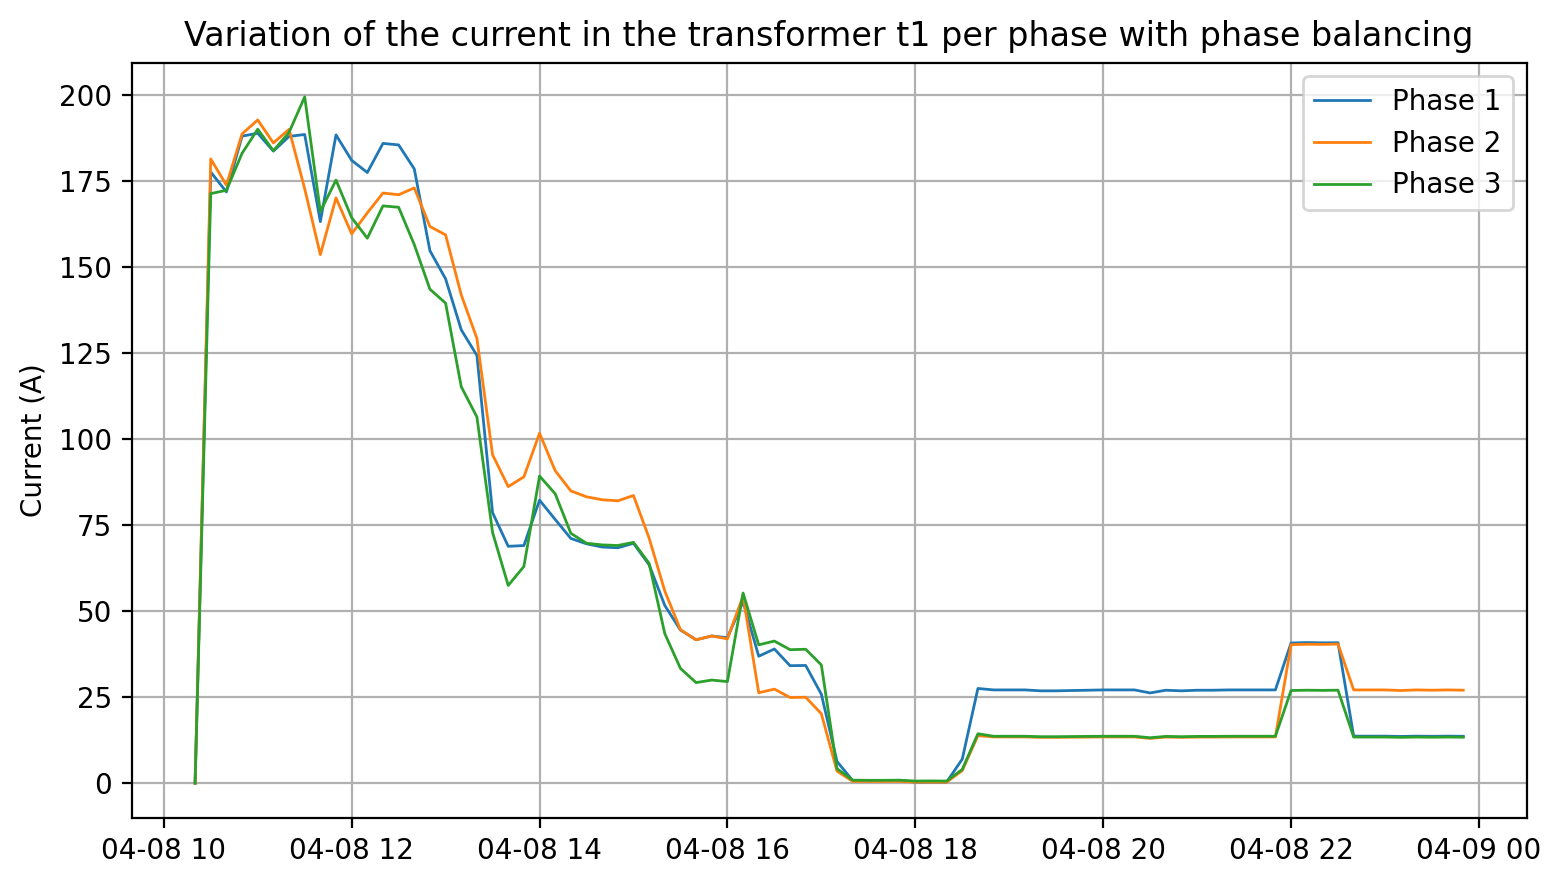

['ca-305', 'ca-149', 'ca-321', 'ca-493', 'ca-501', 'ca-148', 'ca-319', 'ca-322', 'ca-311', 'ca-495', 'ca-323', 'ca-310', 'ca-502', 'ca-489', 'ca-492', 'ca-498', 'ca-504', 'ca-304', 'ca-494', 'ca-327', 'ca-497', 'ca-508', 'ca-326', 'ca-318', 'ca-490', 'ca-303', 'ca-317', 'ca-307', 'ca-309', 'ca-506', 'ca-324', 'ca-491', 'ca-313', 'ca-512', 'ca-507', 'ca-513', 'ca-312', 'ca-325', 'ca-496', 'ca-510', 'ca-316', 'ca-308', 'ca-509', 'ca-499', 'ca-213', 'ca-505', 'ca-503', 'ca-306', 'ca-212', 'ca-511', 'ca-315', 'ca-320', 'ca-500', 'ca-314']


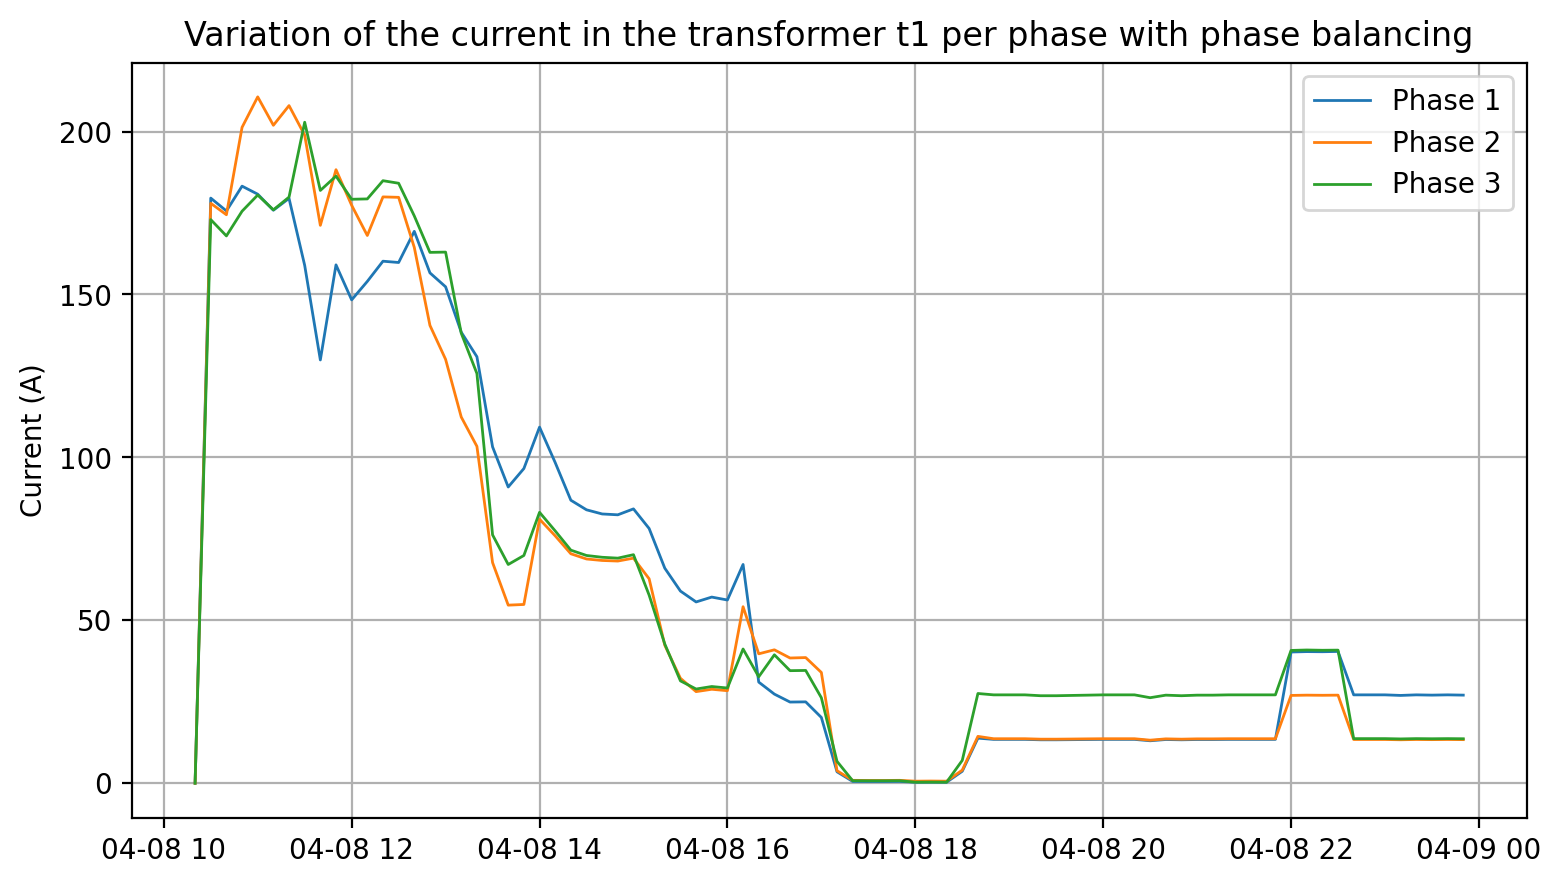

['ca-311', 'ca-509', 'ca-310', 'ca-321', 'ca-148', 'ca-508', 'ca-493', 'ca-312', 'ca-307', 'ca-511', 'ca-491', 'ca-510', 'ca-513', 'ca-504', 'ca-213', 'ca-496', 'ca-316', 'ca-149', 'ca-502', 'ca-309', 'ca-495', 'ca-501', 'ca-323', 'ca-303', 'ca-212', 'ca-319', 'ca-506', 'ca-512', 'ca-314', 'ca-507', 'ca-317', 'ca-313', 'ca-494', 'ca-315', 'ca-326', 'ca-304', 'ca-306', 'ca-503', 'ca-318', 'ca-305', 'ca-490', 'ca-308', 'ca-497', 'ca-505', 'ca-498', 'ca-325', 'ca-499', 'ca-492', 'ca-489', 'ca-320', 'ca-327', 'ca-500', 'ca-324', 'ca-322']


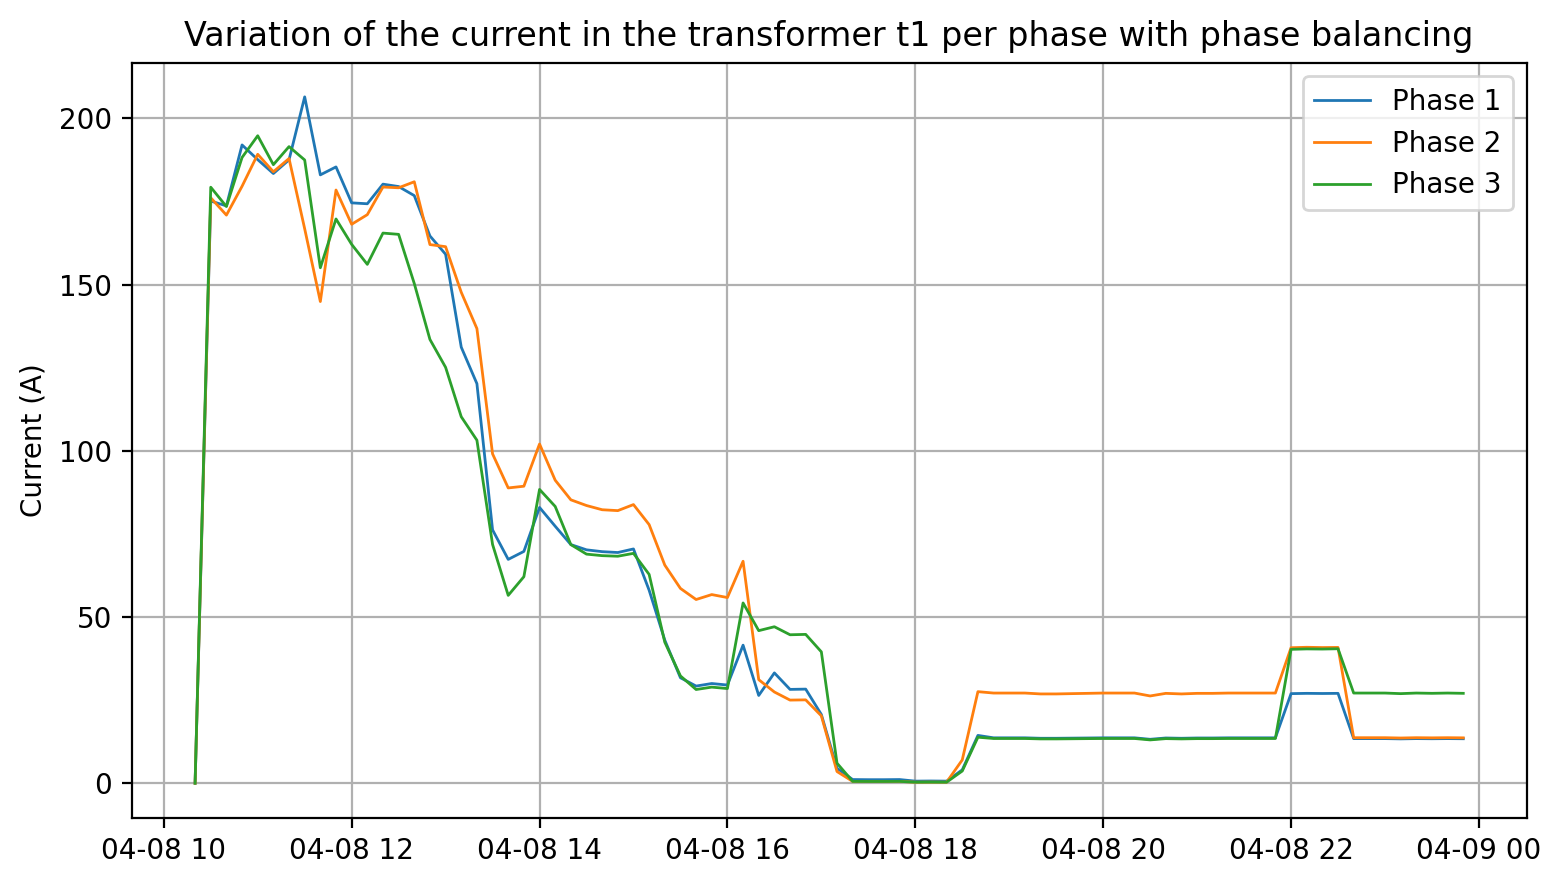

['ca-498', 'ca-494', 'ca-327', 'ca-495', 'ca-321', 'ca-323', 'ca-324', 'ca-326', 'ca-492', 'ca-489', 'ca-501', 'ca-504', 'ca-149', 'ca-320', 'ca-307', 'ca-511', 'ca-312', 'ca-510', 'ca-512', 'ca-314', 'ca-493', 'ca-506', 'ca-325', 'ca-508', 'ca-212', 'ca-318', 'ca-308', 'ca-507', 'ca-317', 'ca-310', 'ca-505', 'ca-503', 'ca-313', 'ca-490', 'ca-309', 'ca-509', 'ca-491', 'ca-148', 'ca-304', 'ca-311', 'ca-500', 'ca-322', 'ca-499', 'ca-497', 'ca-213', 'ca-496', 'ca-306', 'ca-315', 'ca-305', 'ca-316', 'ca-513', 'ca-319', 'ca-502', 'ca-303']


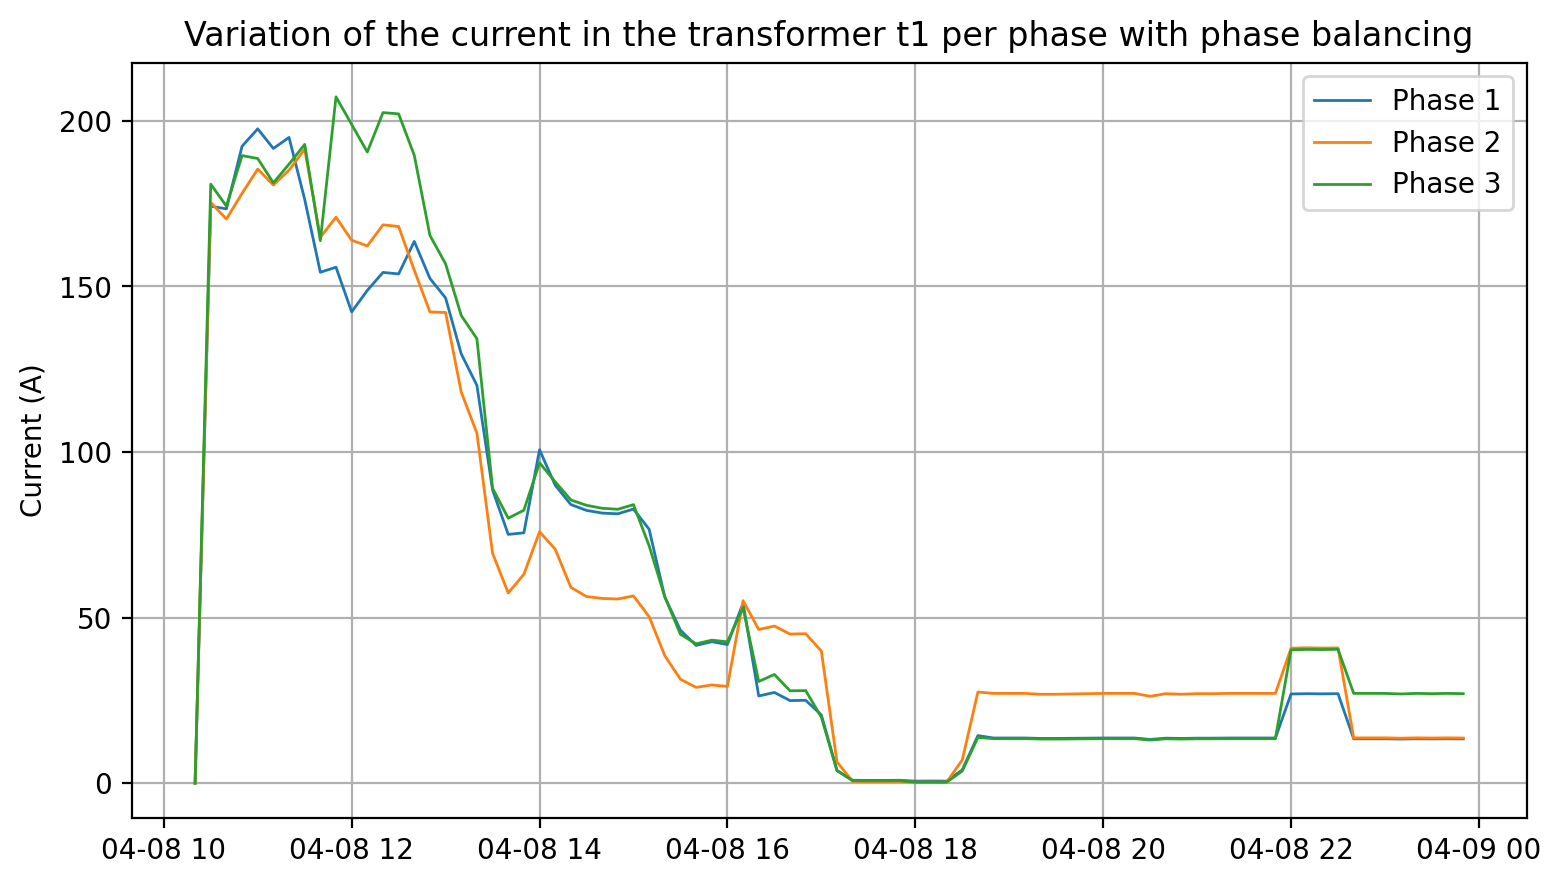

['ca-323', 'ca-310', 'ca-503', 'ca-490', 'ca-314', 'ca-512', 'ca-312', 'ca-311', 'ca-492', 'ca-499', 'ca-308', 'ca-148', 'ca-506', 'ca-489', 'ca-501', 'ca-313', 'ca-494', 'ca-504', 'ca-495', 'ca-320', 'ca-497', 'ca-307', 'ca-149', 'ca-319', 'ca-318', 'ca-324', 'ca-509', 'ca-212', 'ca-491', 'ca-493', 'ca-508', 'ca-305', 'ca-500', 'ca-213', 'ca-326', 'ca-505', 'ca-327', 'ca-321', 'ca-502', 'ca-322', 'ca-309', 'ca-315', 'ca-507', 'ca-303', 'ca-498', 'ca-511', 'ca-306', 'ca-510', 'ca-304', 'ca-496', 'ca-316', 'ca-325', 'ca-317', 'ca-513']


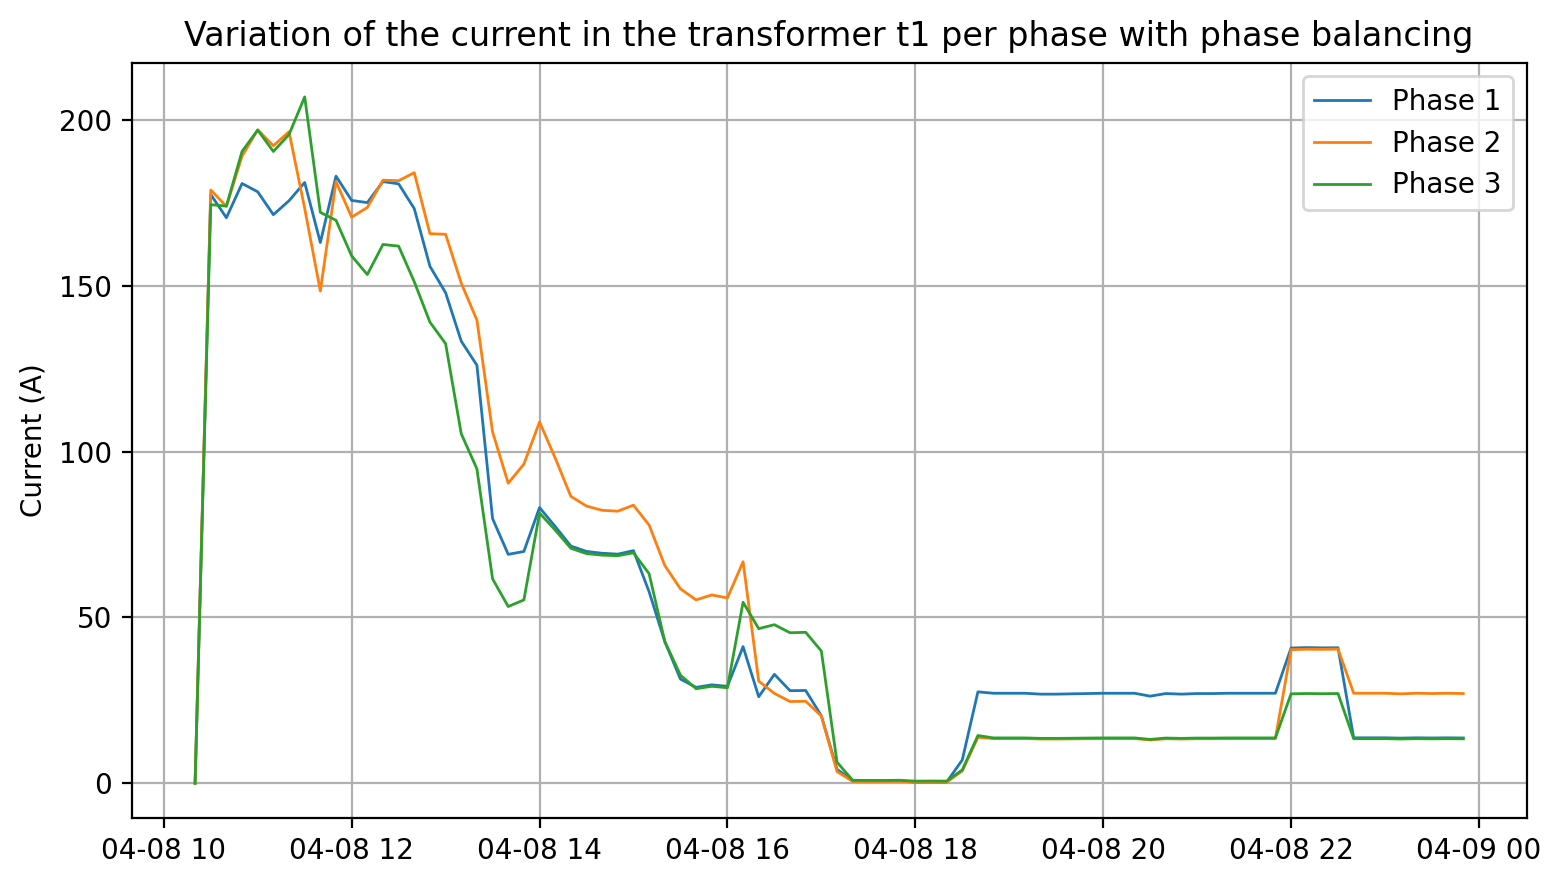

['ca-315', 'ca-310', 'ca-321', 'ca-212', 'ca-317', 'ca-507', 'ca-510', 'ca-313', 'ca-303', 'ca-513', 'ca-327', 'ca-509', 'ca-324', 'ca-314', 'ca-505', 'ca-318', 'ca-508', 'ca-493', 'ca-309', 'ca-490', 'ca-306', 'ca-506', 'ca-499', 'ca-307', 'ca-325', 'ca-213', 'ca-323', 'ca-320', 'ca-489', 'ca-503', 'ca-149', 'ca-512', 'ca-504', 'ca-498', 'ca-511', 'ca-492', 'ca-501', 'ca-326', 'ca-491', 'ca-311', 'ca-496', 'ca-497', 'ca-308', 'ca-494', 'ca-322', 'ca-148', 'ca-312', 'ca-305', 'ca-500', 'ca-502', 'ca-316', 'ca-495', 'ca-304', 'ca-319']


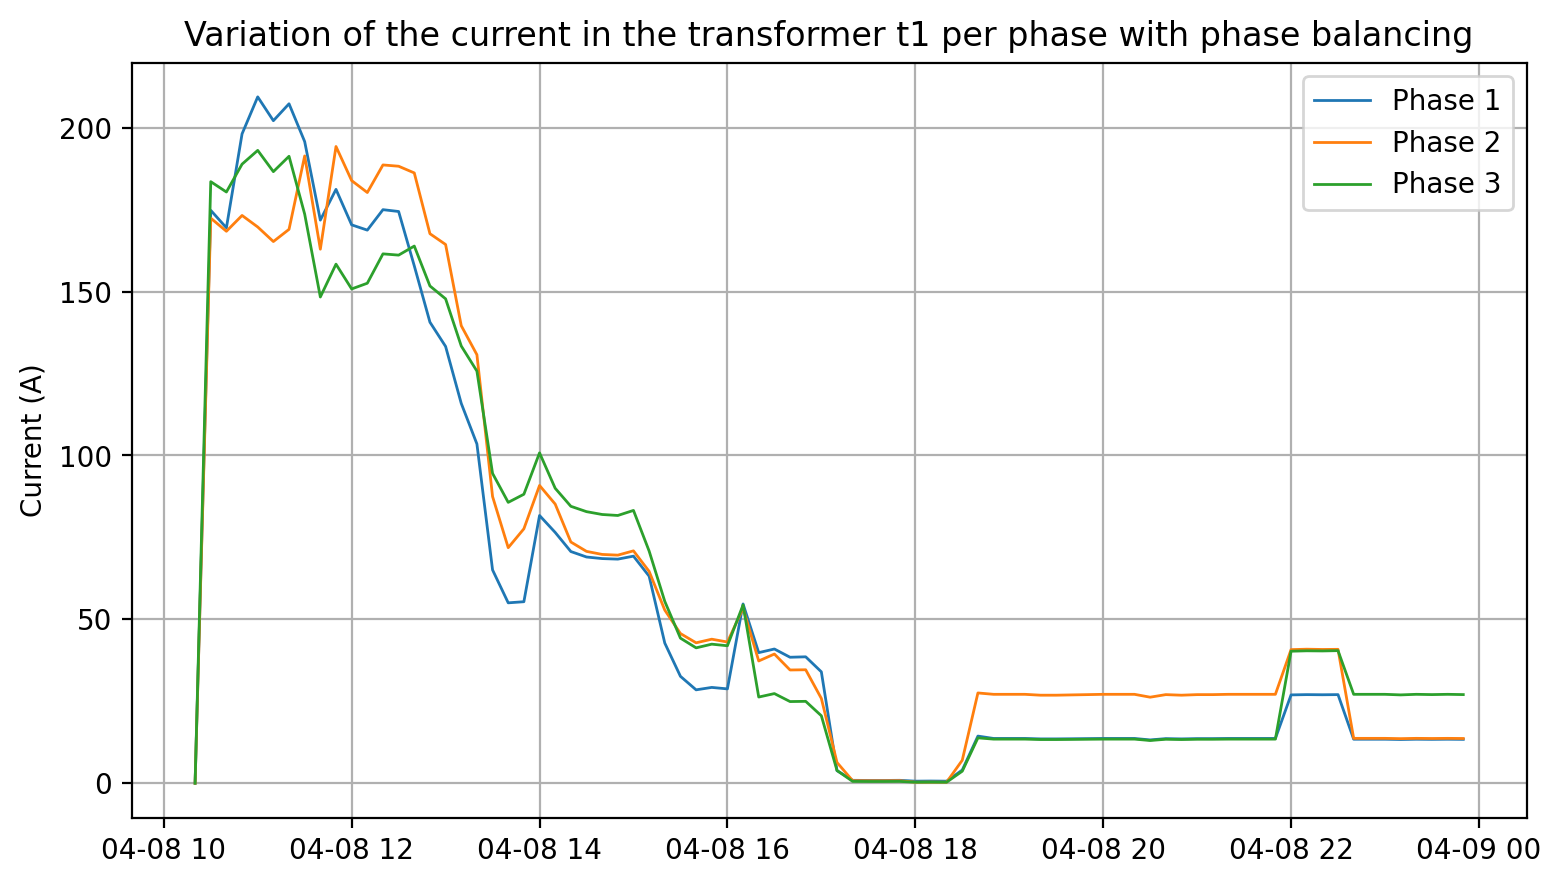

['ca-307', 'ca-513', 'ca-312', 'ca-494', 'ca-321', 'ca-148', 'ca-326', 'ca-318', 'ca-306', 'ca-212', 'ca-495', 'ca-511', 'ca-510', 'ca-489', 'ca-324', 'ca-325', 'ca-322', 'ca-491', 'ca-507', 'ca-317', 'ca-309', 'ca-149', 'ca-303', 'ca-501', 'ca-308', 'ca-499', 'ca-311', 'ca-323', 'ca-497', 'ca-315', 'ca-319', 'ca-496', 'ca-310', 'ca-512', 'ca-498', 'ca-508', 'ca-304', 'ca-327', 'ca-509', 'ca-506', 'ca-503', 'ca-213', 'ca-505', 'ca-316', 'ca-500', 'ca-313', 'ca-492', 'ca-493', 'ca-305', 'ca-504', 'ca-502', 'ca-314', 'ca-320', 'ca-490']


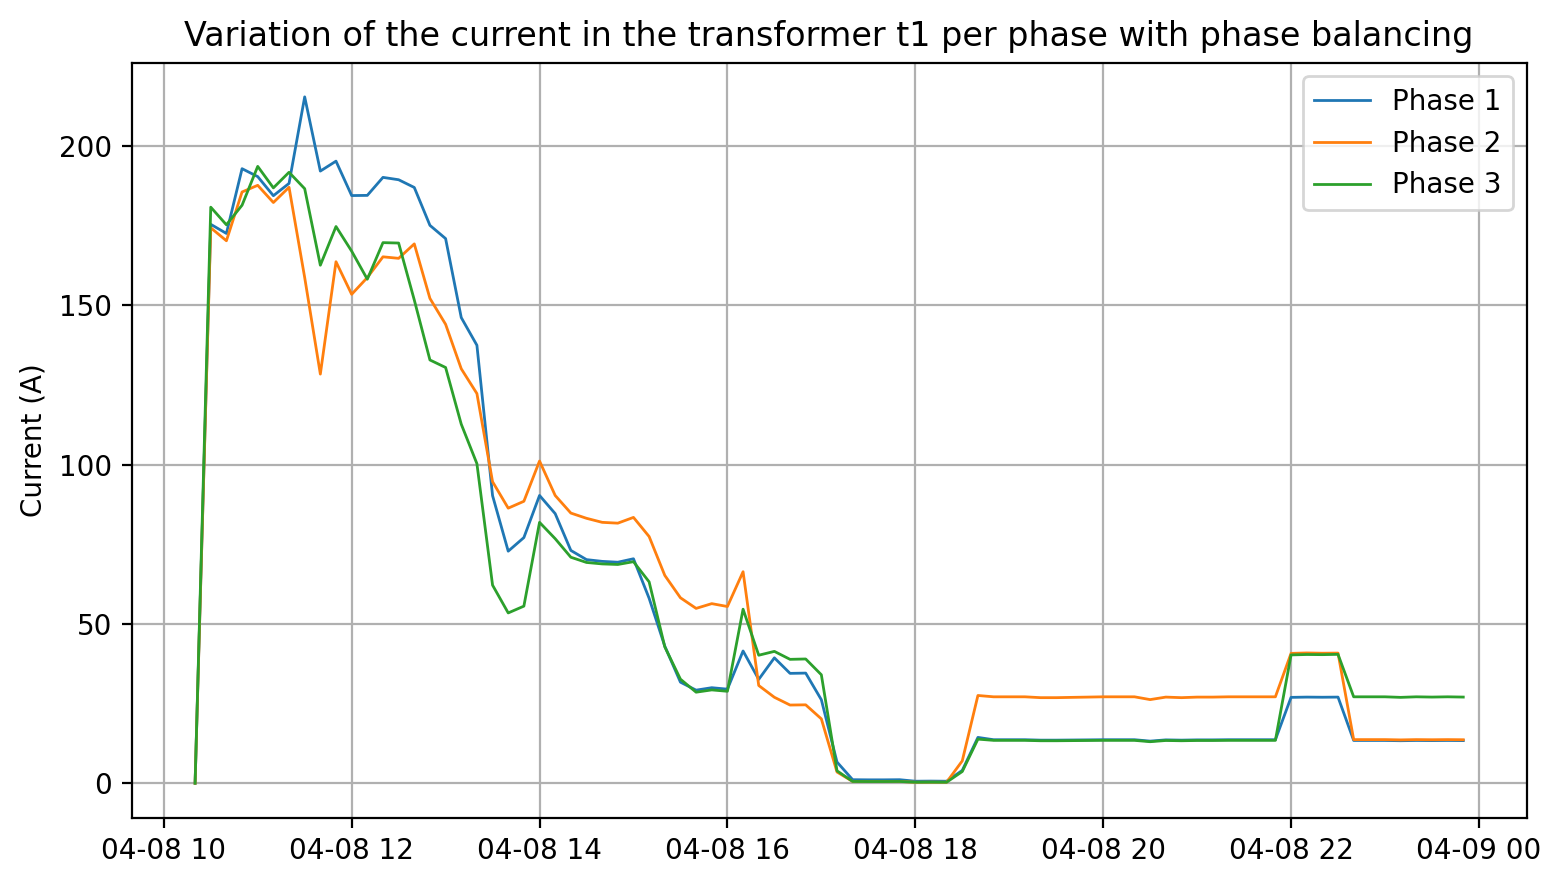

['ca-507', 'ca-304', 'ca-213', 'ca-316', 'ca-319', 'ca-497', 'ca-511', 'ca-327', 'ca-491', 'ca-303', 'ca-305', 'ca-495', 'ca-309', 'ca-325', 'ca-513', 'ca-498', 'ca-312', 'ca-322', 'ca-320', 'ca-504', 'ca-308', 'ca-313', 'ca-321', 'ca-326', 'ca-499', 'ca-496', 'ca-501', 'ca-506', 'ca-306', 'ca-324', 'ca-512', 'ca-510', 'ca-492', 'ca-315', 'ca-503', 'ca-318', 'ca-314', 'ca-307', 'ca-311', 'ca-493', 'ca-494', 'ca-502', 'ca-317', 'ca-489', 'ca-500', 'ca-508', 'ca-148', 'ca-212', 'ca-505', 'ca-509', 'ca-490', 'ca-323', 'ca-149', 'ca-310']


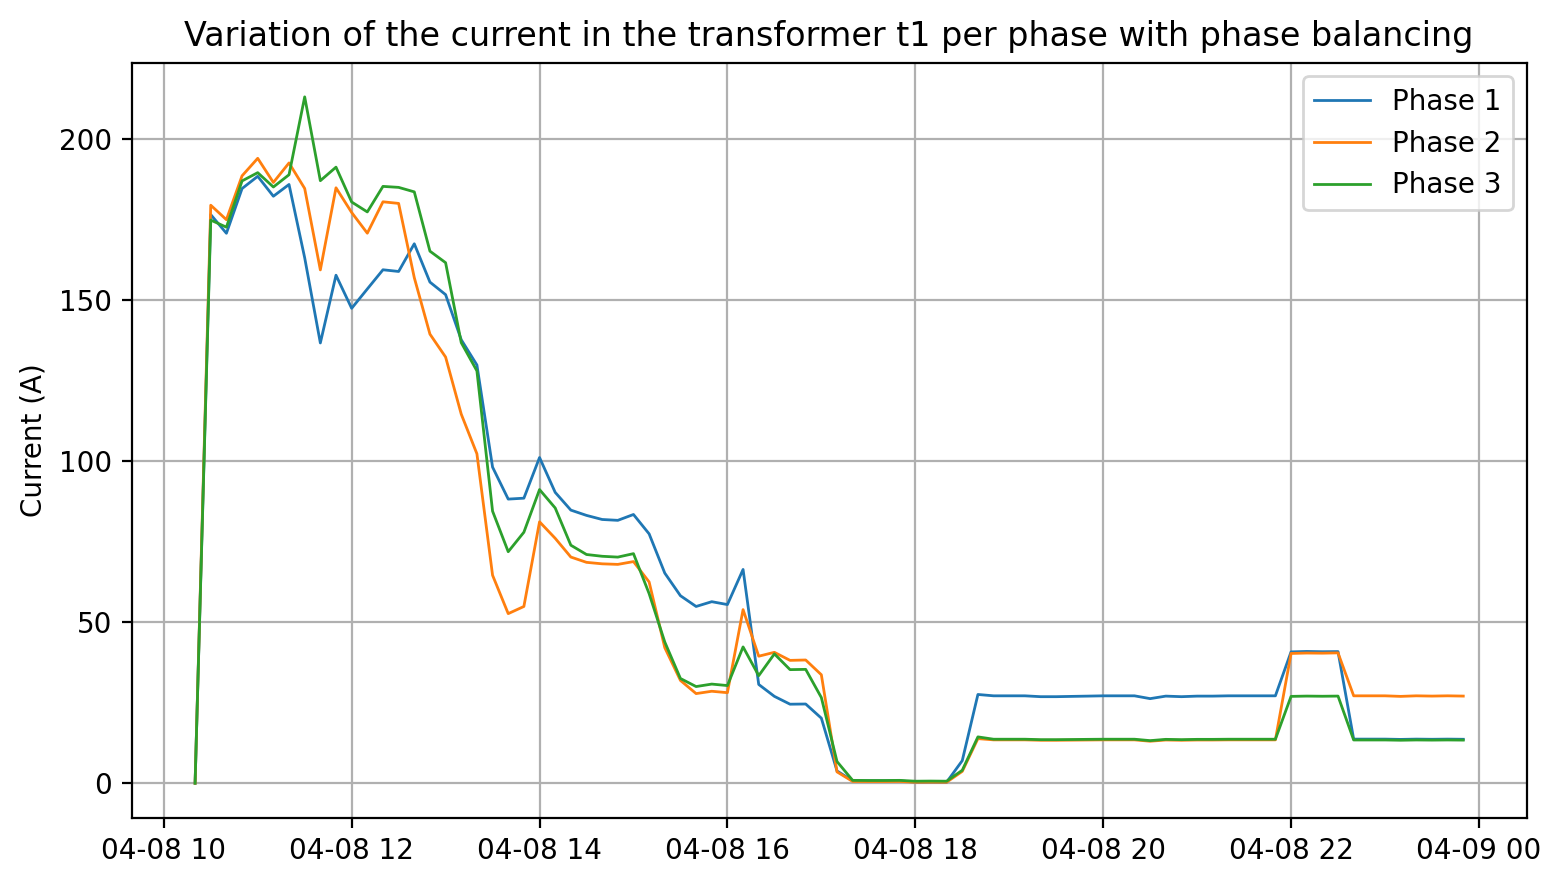

KeyboardInterrupt: 

In [124]:
for j in range(100):
    result = pd.DataFrame()                                                    #Initialize the result DataFrame 
    losses = pd.DataFrame()                                                    #Initialize the losses DataFrame
    voltages = pd.DataFrame()                                                  #Initialize the voltages DataFrame 
    n_sim_pt = data["ca-148"].shape[0]                                         #Number of simulation points
    kW_P1 = 0                                                                  #Initialize the power of the phase one of the transformer t1 to 0 (this doesn't affect the simulation beacause the results are saved ones the main loop begins)
    kW_P2 = 0                                                                  #Initialize the power of the phase tow of the transformer t1 to 0 (this doesn't affect the simulation beacause the results are saved ones the main loop begins)
    kW_P3 = 0                                                                  #Initialize the power of the phase three of the transformer t1 to 0 (this doesn't affect the simulation beacause the results are saved one the main begins)
    station_kW = {}                                                            #Define the station_kW dictionary that contain the power of each station
    station_phases = {}                                                        #Define the station_phases dictionary that contains the phases of each station
    for station in data:                                                       #Initializing station_kW dictionary zeros (this doesn't affect the simulation beacause the results are saved ones the main loop begins)
        station_kW[station] = 0
    for station in data:                                                       #Initializing station_phases dictionary zeros (this doesn't affect the simulation beacause the results are saved ones the main loop begins)
        station_phases[station] = ".1.2"
    loop = tqdm(total=e - b, position=b, leave=False)
    for i in range(b, e):                                                  #The main for loop that iterate over the total simulation point
        loop.set_description("Running simulation...".format(i))
        loop.update(1)
        for station in stations:                                               #for loop that that iterates over the  stations
            prev_station_kW = station_kW[station]                              #Get the previous value of the station power to be used later to dectect the begning of a new charging session
            station_kW[station] = str(float(data[station][i]) * 0.001)         #Convert the power from W to kW
            if float(prev_station_kW) == 0 and float(station_kW[station]) > 0: #Dectect a new charging session begining when the previous station power in null and the new one is non zero
                if max(kW_P1,kW_P2,kW_P3) == kW_P1:                            #Dectect which two phases of the transformer t1 that have the lowes power by knowing the maximum one and then the lowest ones are the others
                    station_phases[station] = ".2.3"                           #Affect the charging session to the two phases that have the lowest power
                if max(kW_P1,kW_P2,kW_P3) == kW_P2:
                    station_phases[station] = ".1.3"
                if max(kW_P1,kW_P2,kW_P3) == kW_P3:
                    station_phases[station] = ".1.2"
            dssText.Command = 'Edit "Load.' + station + '" kW=' + station_kW[station] + ' bus1=' + station_bus[station] + station_phases[station]  #Change the power of the station "station" to its new value of power "station_kW" and phase numbers "station_phases[station]""
            dssSolution.Solve()                                                    #Run a Snap mode simulation
            dssText.Command = 'Export p_byphase'                                   #Export the powers per phase to a csv file to be used later
            dssText.Command = 'Export losses'                                      #Export lines losses to a csv file to be used later
            dssText.Command = 'Export ElemVoltages'
            f = pd.read_csv("ACN_Infrastructure_EXP_P_BYPHASE.csv", nrows=1, header=87)#from the exported csv file
            kW_P1 = f.iloc[0,4]                                                    #Set the new value of power of the phase one of the transformer t1
            kW_P2 = f.iloc[0,6]                                                    #Set the new value of power of the phase two of the transformer t1
            kW_P3 = f.iloc[0,8]                                                    #Set the new value of power of the phase three of the transformer t1
        result = result.append(pd.DataFrame({"P1 (kW)" : [kW_P1], "P2 (kW)" : [kW_P2], "P3 (kW)" : [kW_P3]}))#Saving the result in Pandas DataFrame
        f1 = pd.read_csv("ACN_Infrastructure_EXP_LOSSES.csv")                  #Reading the losses results 
        loss_1 = f1.iloc[1,4]                                                  #losses in the lines of type 1 (only one line)
        l2 = [4, 5]                                                            #List of the indices of the type 2 lines in "ACN_Infrastructure_EXP_LOSSES.csv"
        loss_2 = [f1.iloc[i,1] for i in l2]                                    #List of the losses in the lines of type 2
        l3 = [1, 2, 10, 11, 12, 21, 22, 23]                                    #List of the indices of the type 3 lines in "ACN_Infrastructure_EXP_LOSSES.csv"
        loss_3 = [f1.iloc[i,1] for i in l3]                                    #List of the losses in the lines of type 3
        l4 = [6, 7, 8, 9, 32, 33, 34, 35, 46, 47, 48,
              49, 59, 60, 61, 62, 73, 74, 75, 76]                              #List of the indices of the type 4 lines in "ACN_Infrastructure_EXP_LOSSES.csv"
        loss_4 = [f1.iloc[i,1] for i in l4]                                    #List of the losses in the lines of type 4
        l5 = [13, 14, 15, 16, 17, 18, 19, 20, 24, 25, 26, 27, 28, 
              29, 30, 31, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 
              50, 51, 52, 53, 54, 55, 56, 57, 58, 63, 64, 65, 66, 
              67, 68, 69, 70, 71, 72, 77, 78, 79, 80, 81, 82, 83, 84, 85]      #List of the indices of the type 5 lines in "ACN_Infrastructure_EXP_LOSSES.csv"
        loss_5 = [f1.iloc[i,4] for i in l5]                                    #List of the losses in the lines of type 5
        loss = [f1.iloc[i,1] for i in range(1,86)]                             #List of the losses in each line
        d = {"Type 1 lines losses (W)" : [loss_1],                             
             "Type 2 lines losses (W)" : [sum(loss_2)],  
             "Type 3 lines losses (W)" : [sum(loss_3)], 
             "Type 4 lines losses (W)" : [sum(loss_4)], 
             "Type 5 lines losses (W)" : [sum(loss_5)], 
             "Total lines losses (W)" : [sum(loss)]}                           #Dictionary that contains losses in different types of lines to be fed to "losses" DataFrame 
        losses = losses.append(pd.DataFrame(d))                                #Appending the dictionary to "losses" dataframe
        f2 = pd.read_csv("ACN_Infrastructure_EXP_ElemVoltages.csv", nrows=1, header=88)
        voltages = voltages.append(pd.DataFrame({"V1 (V)" : [f2.iloc[0,3]],
                                                 "Ang1 (°)" : [f2.iloc[0,4]],
                                                 "V2 (V)" : [f2.iloc[0,7]],
                                                 "Ang2 (°)" : [f2.iloc[0,8]],
                                                 "V3 (V)" : [f2.iloc[0,5]],
                                                 "Ang3 (°)" : [f2.iloc[0,6]]}))
    print(stations)
    random.shuffle(stations)
    figure(figsize=(9, 5), dpi=200)
    plt.plot(dates,result["P1 (kW)"] * 1000 / 120, linewidth=1, label = "Phase 1")
    plt.plot(dates,result["P2 (kW)"] * 1000 / 120, linewidth=1, label = "Phase 2")
    plt.plot(dates,result["P3 (kW)"] * 1000 / 120, linewidth=1, label = "Phase 3")
    plt.ylabel("Current (A)")
    plt.title("Variation of the current in the transformer t1 per phase with phase balancing")
    plt.legend()
    plt.grid()
    plt.show()

In [104]:
order = list(range(54))

In [108]:
random.shuffle(order)

In [110]:
random.shuffle(stations)

In [121]:
stations

['ca-148',
 'ca-149',
 'ca-212',
 'ca-213',
 'ca-303',
 'ca-304',
 'ca-305',
 'ca-306',
 'ca-307',
 'ca-308',
 'ca-309',
 'ca-310',
 'ca-311',
 'ca-312',
 'ca-313',
 'ca-314',
 'ca-315',
 'ca-316',
 'ca-317',
 'ca-318',
 'ca-319',
 'ca-320',
 'ca-321',
 'ca-322',
 'ca-323',
 'ca-324',
 'ca-325',
 'ca-326',
 'ca-327',
 'ca-489',
 'ca-490',
 'ca-491',
 'ca-492',
 'ca-493',
 'ca-494',
 'ca-495',
 'ca-496',
 'ca-497',
 'ca-498',
 'ca-499',
 'ca-500',
 'ca-501',
 'ca-502',
 'ca-503',
 'ca-504',
 'ca-505',
 'ca-506',
 'ca-507',
 'ca-508',
 'ca-509',
 'ca-510',
 'ca-511',
 'ca-512',
 'ca-513']